In [14]:
import pandas as pd #...................................................to load and manipulate data
import numpy as np #....................................................to calculation
import seaborn as sns #.................................................to plot the heatmap

from matplotlib import pyplot as plt #..................................to plot graphs
from sklearn import neighbors #.........................................to find the nearest neighbour
from sklearn.model_selection import train_test_split #..................to split the data into training and testing sets
from sklearn.metrics import accuracy_score #............................to check the accuracy score
from sklearn import preprocessing #.....................................
from sklearn.tree import DecisionTreeClassifier #.......................to buid a classification tree
from sklearn.preprocessing import MinMaxScaler #........................
from ipywidgets import interactive #....................................to create interactive charts
from sklearn.metrics import normalized_mutual_info_score #..............to calculate normalised mutual information
from sklearn.metrics import mean_squared_error, r2_score#...............to calculate linear regression model
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer
from sklearn import tree
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency
import scipy.stats as stats 
%matplotlib inline

Data_w = pd.read_csv("weather_data.csv")
Data_p = pd.read_csv("price_demand_data.csv")

display(Data_w)
display(Data_p)


,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2021,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,6,N,2,1018.8,28.1,43,5,E,13,1015.3
1,2/01/2021,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,7,NW,17,1013.3,28.7,38,7,SW,4,1008.5
2,3/01/2021,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,8,SW,4,1007.7,23.5,59,4,SW,2,1005.2
3,4/01/2021,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,8,SE,11,1010.0,18.2,82,8,SW,17,1011.0
4,5/01/2021,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,8,SE,13,1012.5,18.2,82,8,SE,19,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,24/08/2021,6.4,13.1,10.4,4.0,6.2,S,39,9:38,10.8,...,7,SE,17,1021.5,11.7,55,6,S,17,1021.6
214,25/08/2021,8.0,14.1,2.2,1.2,5.4,S,37,16:26,12.1,...,3,SE,15,1023.3,13.4,59,6,SW,17,1021.8
215,28/08/2021,5.3,17.8,0.0,1.6,9.6,N,39,13:14,9.1,...,1,N,7,1018.6,17.4,31,3,NW,24,1013.5
216,29/08/2021,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,10.6,...,7,N,13,1011.4,12.8,84,7,S,6,1010.4


,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY
0,VIC1,1/01/2021 0:30,4179.21,LOW
1,VIC1,1/01/2021 1:00,4047.76,LOW
2,VIC1,1/01/2021 1:30,3934.70,LOW
3,VIC1,1/01/2021 2:00,3766.45,LOW
4,VIC1,1/01/2021 2:30,3590.37,LOW
...,...,...,...,...
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM
11662,VIC1,31/08/2021 23:30,4834.00,MEDIUM


In [15]:
 # Check the weather data types 
Data_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               218 non-null    object 
 1   Minimum temperature (°C)           218 non-null    float64
 2   Maximum temperature (°C)           218 non-null    float64
 3   Rainfall (mm)                      218 non-null    float64
 4   Evaporation (mm)                   218 non-null    float64
 5   Sunshine (hours)                   218 non-null    float64
 6   Direction of maximum wind gust     218 non-null    object 
 7   Speed of maximum wind gust (km/h)  218 non-null    int64  
 8   Time of maximum wind gust          218 non-null    object 
 9   9am Temperature (°C)               218 non-null    float64
 10  9am relative humidity (%)          218 non-null    int64  
 11  9am cloud amount (oktas)           218 non-null    int64  

In [16]:
# the date type has been changed to date time format, assign to original 

Data_w["Date"] = pd.to_datetime(Data_w["Date"],dayfirst = True)
Data_w["Date"]

0     2021-01-01
1     2021-01-02
2     2021-01-03
3     2021-01-04
4     2021-01-05
         ...    
213   2021-08-24
214   2021-08-25
215   2021-08-28
216   2021-08-29
217   2021-08-30
Name: Date, Length: 218, dtype: datetime64[ns]

In [17]:
Data_p

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY
0,VIC1,1/01/2021 0:30,4179.21,LOW
1,VIC1,1/01/2021 1:00,4047.76,LOW
2,VIC1,1/01/2021 1:30,3934.70,LOW
3,VIC1,1/01/2021 2:00,3766.45,LOW
4,VIC1,1/01/2021 2:30,3590.37,LOW
...,...,...,...,...
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM
11662,VIC1,31/08/2021 23:30,4834.00,MEDIUM


In [18]:
#Seprating Dates & Time in diffrent coloumn

Data_p['Date'] = pd.to_datetime(Data_p['SETTLEMENTDATE'],dayfirst = True). dt. date
Data_p['Time'] = pd.to_datetime(Data_p['SETTLEMENTDATE'],dayfirst = True). dt. time

display(Data_p.head(10))

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,Time
0,VIC1,1/01/2021 0:30,4179.21,LOW,2021-01-01,00:30:00
1,VIC1,1/01/2021 1:00,4047.76,LOW,2021-01-01,01:00:00
2,VIC1,1/01/2021 1:30,3934.70,LOW,2021-01-01,01:30:00
3,VIC1,1/01/2021 2:00,3766.45,LOW,2021-01-01,02:00:00
4,VIC1,1/01/2021 2:30,3590.37,LOW,2021-01-01,02:30:00
5,VIC1,1/01/2021 3:00,3549.37,LOW,2021-01-01,03:00:00
6,VIC1,1/01/2021 3:30,3504.17,LOW,2021-01-01,03:30:00
7,VIC1,1/01/2021 4:00,3547.90,LOW,2021-01-01,04:00:00
8,VIC1,1/01/2021 4:30,3579.11,LOW,2021-01-01,04:30:00
9,VIC1,1/01/2021 5:00,3580.77,LOW,2021-01-01,05:00:00


In [93]:
# Check the data type in all the columns
Data_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11664 entries, 0 to 11663
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REGION          11664 non-null  object 
 1   SETTLEMENTDATE  11664 non-null  object 
 2   TOTALDEMAND     11664 non-null  float64
 3   PRICECATEGORY   11664 non-null  object 
 4   Date            11664 non-null  object 
 5   Time            11664 non-null  object 
dtypes: float64(1), object(5)
memory usage: 546.9+ KB


In [19]:
# We need to extract the dates from date_time data from the settlement date column, for that we convert the column type to datetime format instead of object type

Data_p["Date"] = pd.to_datetime(Data_p["Date"])
Data_p["Date"].head()

0   2021-01-01
1   2021-01-01
2   2021-01-01
3   2021-01-01
4   2021-01-01
Name: Date, dtype: datetime64[ns]

In [20]:
# assign to original
Data_p["Date"] = Data_p["Date"] = pd.to_datetime(Data_p["Date"])
Data_p["Date"]

0       2021-01-01
1       2021-01-01
2       2021-01-01
3       2021-01-01
4       2021-01-01
           ...    
11659   2021-08-31
11660   2021-08-31
11661   2021-08-31
11662   2021-08-31
11663   2021-09-01
Name: Date, Length: 11664, dtype: datetime64[ns]

In [21]:
#Now make them as groups and find the maximum value by DataMining

Data_pg = Data_p.groupby("Date").max("TOTALDEMAND")
Data_pg

,TOTALDEMAND
Date,
2021-01-01,5019.64
2021-01-02,4964.35
2021-01-03,4503.31
2021-01-04,4764.18
2021-01-05,4800.64
...,...
2021-08-28,5716.32
2021-08-29,6227.89
2021-08-30,6072.91


In [22]:
Data_p["TOTALDEMAND"].describe()

count    11664.000000
mean      4925.798454
std        876.407490
min       2708.530000
25%       4255.500000
50%       4803.755000
75%       5477.337500
max       8196.830000
Name: TOTALDEMAND, dtype: float64

In [23]:
#Merged dataset into a dataframe assigned by MergeData
MergeData = Data_w.merge(Data_pg, how = 'inner', on = 'Date') 
MergeData

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),TOTALDEMAND
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,N,2,1018.8,28.1,43,5,E,13,1015.3,5019.64
1,2021-01-02,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,NW,17,1013.3,28.7,38,7,SW,4,1008.5,4964.35
2,2021-01-03,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,SW,4,1007.7,23.5,59,4,SW,2,1005.2,4503.31
3,2021-01-04,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,SE,11,1010.0,18.2,82,8,SW,17,1011.0,4764.18
4,2021-01-05,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,SE,13,1012.5,18.2,82,8,SE,19,1013.3,4800.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2021-08-24,6.4,13.1,10.4,4.0,6.2,S,39,9:38,10.8,...,SE,17,1021.5,11.7,55,6,S,17,1021.6,6717.65
214,2021-08-25,8.0,14.1,2.2,1.2,5.4,S,37,16:26,12.1,...,SE,15,1023.3,13.4,59,6,SW,17,1021.8,6736.80
215,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39,13:14,9.1,...,N,7,1018.6,17.4,31,3,NW,24,1013.5,5716.32
216,2021-08-29,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,10.6,...,N,13,1011.4,12.8,84,7,S,6,1010.4,6227.89


In [24]:
# conversion of average daily temperature for predicting overall 
temp = MergeData.loc[:, "Minimum temperature (°C)":"Maximum temperature (°C)"]
MergeData['Average_temp_/day(°C)'] = temp.mean(axis = 1)
MergeData

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),TOTALDEMAND,Average_temp_/day(°C)
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,2,1018.8,28.1,43,5,E,13,1015.3,5019.64,22.75
1,2021-01-02,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,17,1013.3,28.7,38,7,SW,4,1008.5,4964.35,23.70
2,2021-01-03,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,4,1007.7,23.5,59,4,SW,2,1005.2,4503.31,21.60
3,2021-01-04,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,11,1010.0,18.2,82,8,SW,17,1011.0,4764.18,17.30
4,2021-01-05,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,13,1012.5,18.2,82,8,SE,19,1013.3,4800.64,17.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2021-08-24,6.4,13.1,10.4,4.0,6.2,S,39,9:38,10.8,...,17,1021.5,11.7,55,6,S,17,1021.6,6717.65,9.75
214,2021-08-25,8.0,14.1,2.2,1.2,5.4,S,37,16:26,12.1,...,15,1023.3,13.4,59,6,SW,17,1021.8,6736.80,11.05
215,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39,13:14,9.1,...,7,1018.6,17.4,31,3,NW,24,1013.5,5716.32,11.55
216,2021-08-29,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,10.6,...,13,1011.4,12.8,84,7,S,6,1010.4,6227.89,12.65


In [25]:
# Renaming TOTALDEMAND to MAXDEMAND
MergeData.rename(columns = {'TOTALDEMAND':'MAXDEMAND'}, inplace = True)
display(MergeData.head())

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),MAXDEMAND,Average_temp_/day(°C)
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,2,1018.8,28.1,43,5,E,13,1015.3,5019.64,22.75
1,2021-01-02,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,17,1013.3,28.7,38,7,SW,4,1008.5,4964.35,23.70
2,2021-01-03,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,4,1007.7,23.5,59,4,SW,2,1005.2,4503.31,21.60
3,2021-01-04,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,11,1010.0,18.2,82,8,SW,17,1011.0,4764.18,17.30
4,2021-01-05,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,13,1012.5,18.2,82,8,SE,19,1013.3,4800.64,17.50


### Compared maximum daily energy used during different session in a year based on temperature

In [100]:
MergeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 217
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               218 non-null    datetime64[ns]
 1   Minimum temperature (°C)           218 non-null    float64       
 2   Maximum temperature (°C)           218 non-null    float64       
 3   Rainfall (mm)                      218 non-null    float64       
 4   Evaporation (mm)                   218 non-null    float64       
 5   Sunshine (hours)                   218 non-null    float64       
 6   Direction of maximum wind gust     218 non-null    object        
 7   Speed of maximum wind gust (km/h)  218 non-null    int64         
 8   Time of maximum wind gust          218 non-null    object        
 9   9am Temperature (°C)               218 non-null    float64       
 10  9am relative humidity (%)          218

In [26]:
FEATURES = ['MAXDEMAND','Minimum temperature (°C)','Maximum temperature (°C)','Rainfall (mm)','Evaporation (mm)','Sunshine (hours)','Speed of maximum wind gust (km/h)'
         ,'9am Temperature (°C)','3pm Temperature (°C)','Average_temp_/day(°C)']
MergeData[FEATURES].corr(method = 'pearson')

,MAXDEMAND,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),3pm Temperature (°C),Average_temp_/day(°C)
MAXDEMAND,1.000000,-0.473554,-0.255099,-0.102213,-0.245547,-0.168017,0.110848,-0.359269,-0.282463,-0.372465
Minimum temperature (°C),-0.473554,1.000000,0.701584,0.058010,0.650019,0.117211,0.002160,0.910744,0.654199,0.890526
Maximum temperature (°C),-0.255099,0.701584,1.000000,-0.122528,0.626420,0.489657,-0.088700,0.818239,0.966990,0.948958
Rainfall (mm),-0.102213,0.058010,-0.122528,1.000000,-0.067168,-0.118420,0.013371,-0.018478,-0.124299,-0.052549
Evaporation (mm),-0.245547,0.650019,0.626420,-0.067168,1.000000,0.306203,0.115854,0.707067,0.560833,0.687632
Sunshine (hours),-0.168017,0.117211,0.489657,-0.118420,0.306203,1.000000,-0.034018,0.224974,0.518218,0.364489
Speed of maximum wind gust (km/h),0.110848,0.002160,-0.088700,0.013371,0.115854,-0.034018,1.000000,0.075885,-0.133549,-0.055672
9am Temperature (°C),-0.359269,0.910744,0.818239,-0.018478,0.707067,0.224974,0.075885,1.000000,0.758206,0.925495
3pm Temperature (°C),-0.282463,0.654199,0.966990,-0.124299,0.560833,0.518218,-0.133549,0.758206,1.000000,0.906910
Average_temp_/day(°C),-0.372465,0.890526,0.948958,-0.052549,0.687632,0.364489,-0.055672,0.925495,0.906910,1.000000


Pearson r is  0.8518240526639236 between Maximum temperature and Maximum demand in summer time
Pearson r is  -0.6117779231498518 between Average temperature and Maximum demand  in Autumn time
Pearson r is  -0.6840476215969429 between Maximum temperature and Maximum demand in winter time
Pearson r is  -0.4735543823255307 between Minimum temperature and Maximum demand Overall_year
Pearson r is  -0.2550987001766938 between Maximum temperature and Maximum demand Overall_year


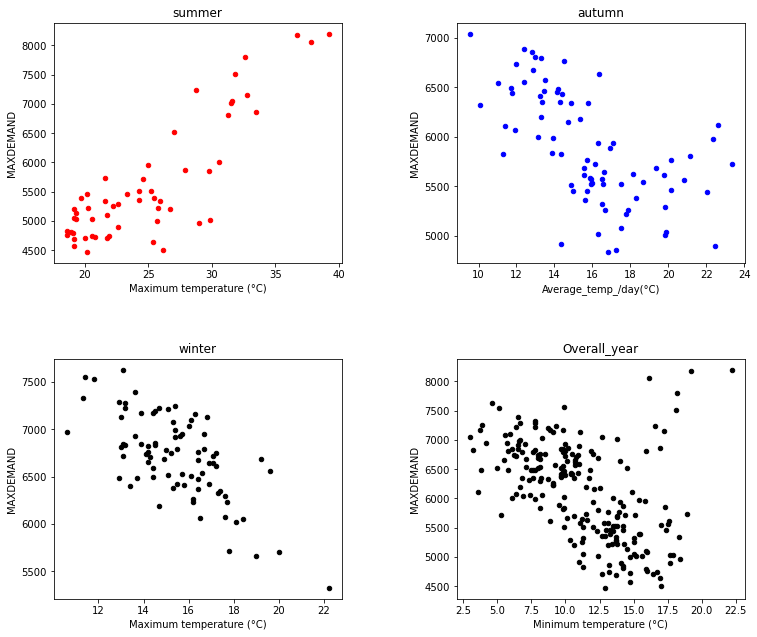

In [232]:
# Compared maximum daily energy used during different session in a year based on temperature

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,10))

ax1 = axes[0][0]
summer_start = '2020-12-01'
summer_end =  '2021-02-28'
summer = MergeData.loc[(MergeData['Date'] >= summer_start) & (MergeData['Date'] <= summer_end)]
summer.plot.scatter (x = 'Maximum temperature (°C)', y = 'MAXDEMAND', title = "summer", ax = ax1, lw = 1, c = 'r')
print("Pearson r is ",summer['Maximum temperature (°C)'].corr(summer['MAXDEMAND']), "between Maximum temperature and Maximum demand in summer time")


ax2 = axes[0][1]
autumn_start = '2021-3-01'
autumn_end = '2021-5-31'
autumn = MergeData.loc[(MergeData['Date'] >= autumn_start) & (MergeData['Date'] <= autumn_end)]
autumn.plot.scatter (x = 'Average_temp_/day(°C)', y = 'MAXDEMAND',title = "autumn", ax = ax2, lw = 1, c = 'b')
print("Pearson r is ",autumn['Average_temp_/day(°C)'].corr(autumn['MAXDEMAND']), "between Average temperature and Maximum demand  in Autumn time")


ax3 = axes[1][0]
winter_start = '2021-06-01'
winter_end = '2021-08-31'
winter = MergeData.loc[(MergeData['Date'] >= '2021-06-01') & (MergeData['Date'] <= '2021-08-31') ]
winter.plot.scatter (x = 'Maximum temperature (°C)', y = 'MAXDEMAND',title = "winter", ax = ax3, lw = 1, c = 'k')
print("Pearson r is ",winter['Maximum temperature (°C)'].corr(winter['MAXDEMAND']), "between Maximum temperature and Maximum demand in winter time")


ax4 = axes[1][1]
Day_start = '2020-01-01'
Day_end = '2021-08-31'
Overall = MergeData.loc[(MergeData['Date'] >= '2021-01-01') & (MergeData['Date'] <= '2021-08-31') ]
Overall.plot.scatter (x = 'Minimum temperature (°C)', y = 'MAXDEMAND', title = "Overall_year", ax = ax4, lw = 1, c = 'k')
print("Pearson r is ",Overall['Minimum temperature (°C)'].corr(Overall['MAXDEMAND']), "between Minimum temperature and Maximum demand Overall_year")
print("Pearson r is ",Overall['Maximum temperature (°C)'].corr(Overall['MAXDEMAND']), "between Maximum temperature and Maximum demand Overall_year")



plt.subplots_adjust(left = 0.1,bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.4, hspace = 0.4)
plt.show()

In [27]:
# get max. energy usage of each day
new_price_df = MergeData.groupby(['Date'])['MAXDEMAND'].max().reset_index()
new_price_df.rename(columns = {'TOTALDEMAND':'MAXDEMAND'}, inplace = True)
new_price_df.info()
display(new_price_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       218 non-null    datetime64[ns]
 1   MAXDEMAND  218 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.5 KB


,Date,MAXDEMAND
0,2021-01-01,5019.64
1,2021-01-02,4964.35
2,2021-01-03,4503.31
3,2021-01-04,4764.18
4,2021-01-05,4800.64
...,...,...
213,2021-08-24,6717.65
214,2021-08-25,6736.80
215,2021-08-28,5716.32
216,2021-08-29,6227.89


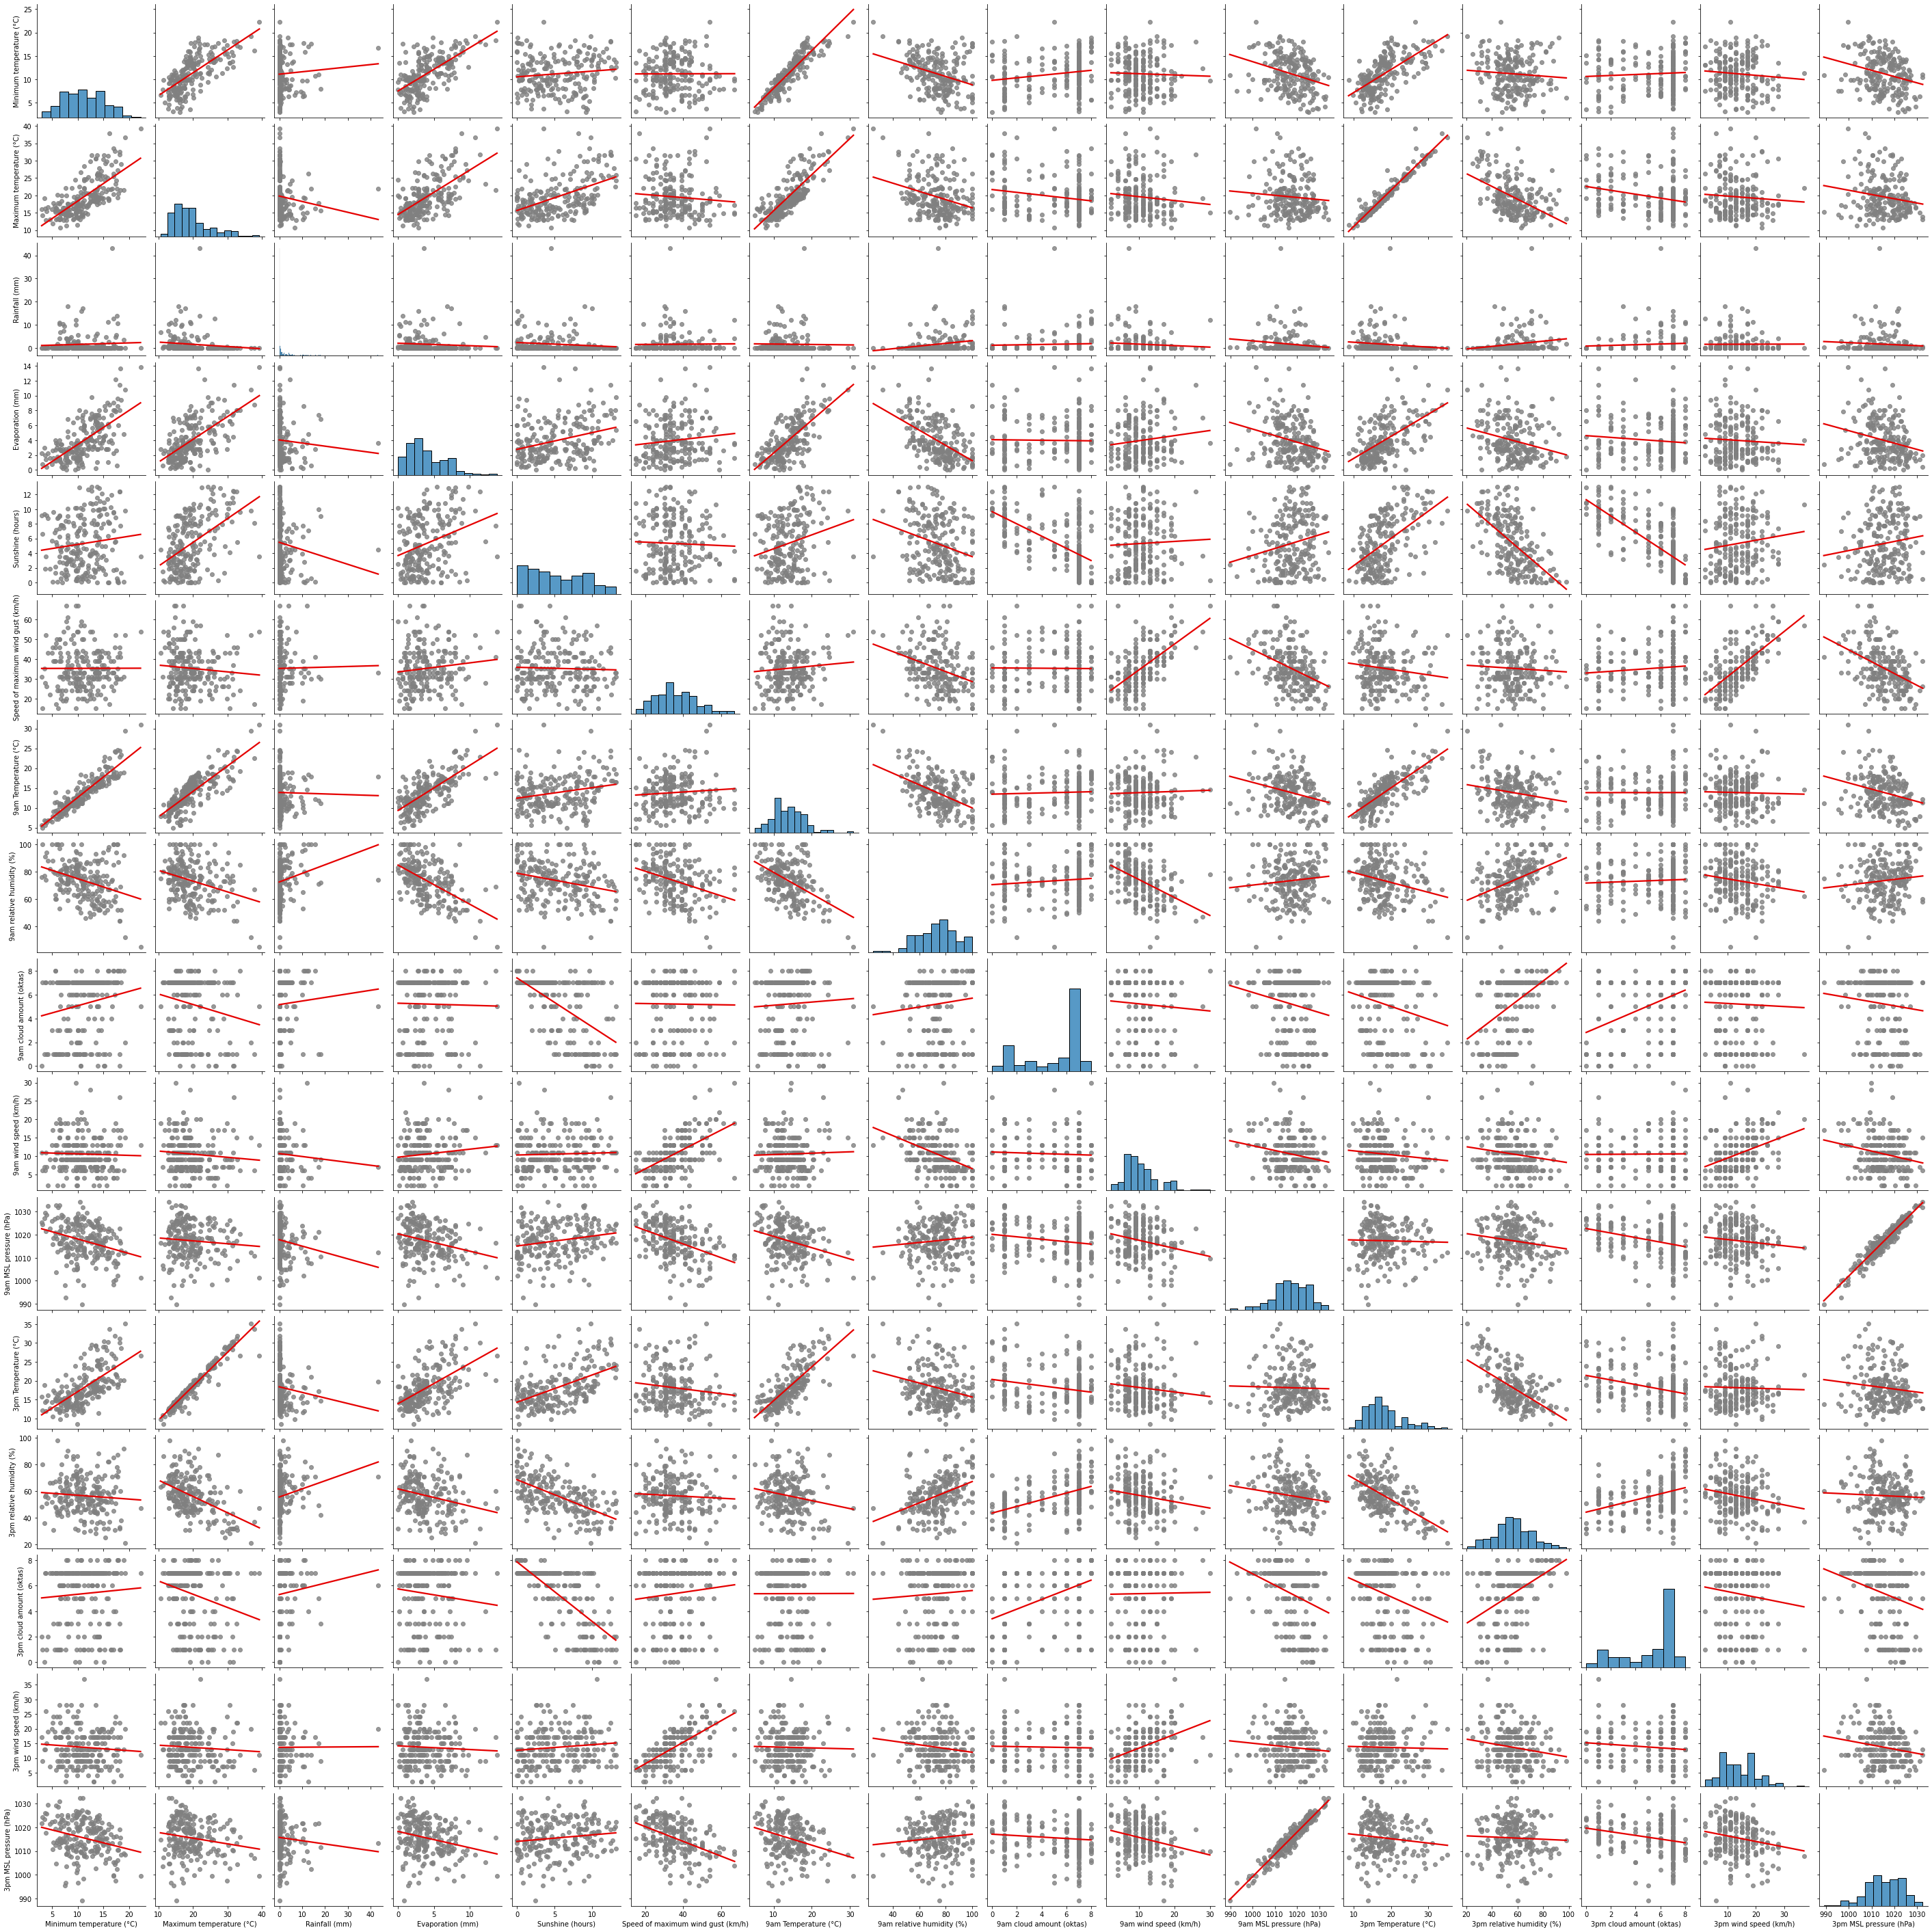

In [108]:
sns.pairplot(Data_w, kind = 'reg', plot_kws = {'ci':None, 'color':'xkcd:red', 'scatter_kws': {'color':'gray'}})

### Determine correlation among the parameters of the dataset by heatmap

Text(0.5, 1.0, 'Corrilation Map to explain the strength of relationship')

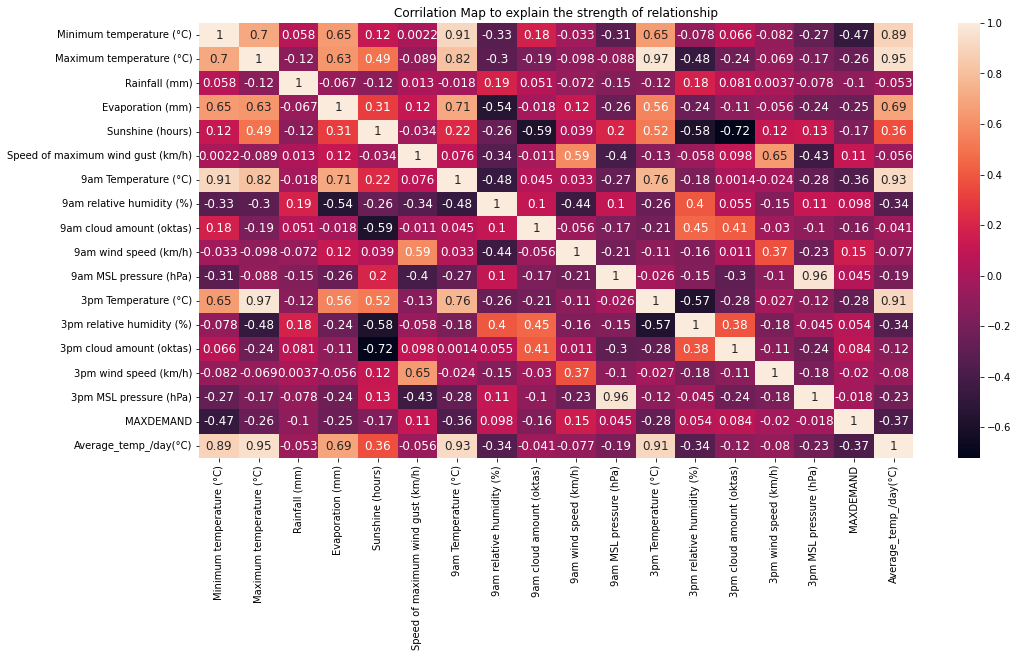

In [113]:
# Correlation values- Strong positive correlations has light colour, negative corrilations has dark colour.
plt.figure(figsize = (16,8))
sns.heatmap(MergeData.corr(), annot = True, annot_kws = {"size":12})

plt.title("Corrilation Map to explain the strength of relationship")
#sns.heatmap(MergeData, annot=True, fmt=".lf", linewidth=5, square=True, cmap='Blues_r')


<AxesSubplot:xlabel='Maximum temperature (°C)', ylabel='MAXDEMAND'>

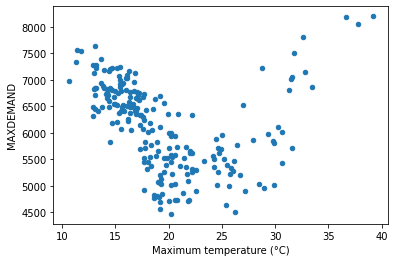

In [28]:
#When the weather is extramly low or exreamly high, then the total demand increases, as people use the energy to maintain the temperature.
MergeData.plot.scatter (x = 'Maximum temperature (°C)',
                        y = 'MAXDEMAND')

In [120]:
myMax = max(max(MergeData['Maximum temperature (°C)']), max(MergeData['MAXDEMAND']))
myMax

8196.83

In [29]:
# get the min

myMin = min(min(MergeData['Maximum temperature (°C)']), max(MergeData['MAXDEMAND']))
myMin

10.6

<AxesSubplot:xlabel='3pm Temperature (°C)', ylabel='MAXDEMAND'>

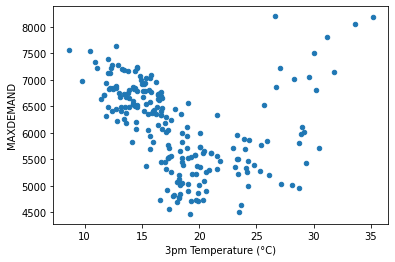

In [30]:
MergeData.plot.scatter (x = '3pm Temperature (°C)',
                        y = 'MAXDEMAND')


In [31]:
myMax = max(max(MergeData['3pm Temperature (°C)']), max(MergeData['MAXDEMAND']))
myMax

8196.83

In [32]:
myMin = min(min(MergeData['3pm Temperature (°C)']), max(MergeData['MAXDEMAND']))
myMin

8.6

In [125]:
# 3 pm is the time that the temperature goes up in summer.Therefore this chart was plotted to give a random idea on energy demand.


In [33]:
col = MergeData.loc[:, "Minimum temperature (°C)":"Maximum temperature (°C)"]
MergeData['Average_temp_/day(°C)'] = col.mean(axis = 1)
MergeData

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),MAXDEMAND,Average_temp_/day(°C)
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,2,1018.8,28.1,43,5,E,13,1015.3,5019.64,22.75
1,2021-01-02,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,17,1013.3,28.7,38,7,SW,4,1008.5,4964.35,23.70
2,2021-01-03,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,4,1007.7,23.5,59,4,SW,2,1005.2,4503.31,21.60
3,2021-01-04,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,11,1010.0,18.2,82,8,SW,17,1011.0,4764.18,17.30
4,2021-01-05,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,13,1012.5,18.2,82,8,SE,19,1013.3,4800.64,17.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2021-08-24,6.4,13.1,10.4,4.0,6.2,S,39,9:38,10.8,...,17,1021.5,11.7,55,6,S,17,1021.6,6717.65,9.75
214,2021-08-25,8.0,14.1,2.2,1.2,5.4,S,37,16:26,12.1,...,15,1023.3,13.4,59,6,SW,17,1021.8,6736.80,11.05
215,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39,13:14,9.1,...,7,1018.6,17.4,31,3,NW,24,1013.5,5716.32,11.55
216,2021-08-29,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,10.6,...,13,1011.4,12.8,84,7,S,6,1010.4,6227.89,12.65


<AxesSubplot:xlabel='Minimum temperature (°C)', ylabel='MAXDEMAND'>

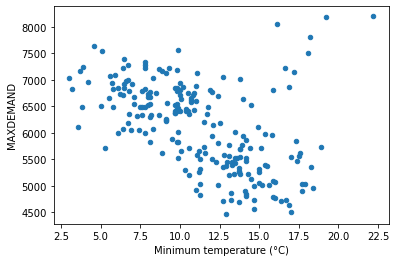

In [127]:
MergeData.plot.scatter (x = 'Minimum temperature (°C)',
                        y = 'MAXDEMAND')

<AxesSubplot:xlabel='Maximum temperature (°C)', ylabel='MAXDEMAND'>

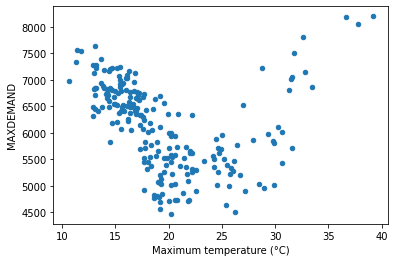

In [34]:
MergeData.plot.scatter (x = 'Maximum temperature (°C)',
                        y = 'MAXDEMAND')

<AxesSubplot:xlabel='Average_temp_/day(°C)', ylabel='MAXDEMAND'>

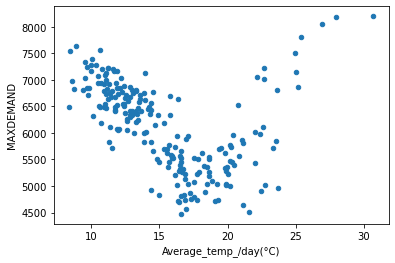

In [129]:
MergeData.plot.scatter (x = 'Average_temp_/day(°C)',
                        y = 'MAXDEMAND')

In [130]:
myMax = max(max(MergeData['Average_temp_/day(°C)']), max(MergeData['MAXDEMAND']))
myMax

8196.83

In [35]:
myMin = min(min(MergeData['Average_temp_/day(°C)']), max(MergeData['MAXDEMAND']))
myMin

8.35

### Finding the relationship between temperature and evaporation, and their effect on energy used

<AxesSubplot:title={'center':' Distribution of Evaporation With Increasing Temperature'}, xlabel='Maximum temperature (°C)', ylabel='Evaporation (mm)'>

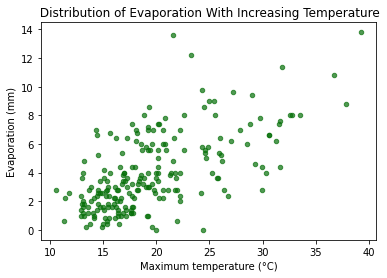

In [36]:
# when the temperature increases, the evaporation increases. So it will gives a linear graph.
MergeData.plot.scatter (x = 'Maximum temperature (°C)',
                        y = 'Evaporation (mm)', title = " Distribution of Evaporation With Increasing Temperature", c = '#07700a', alpha = 0.7)


In [37]:
Linear = ['Evaporation (mm)','Maximum temperature (°C)']
MergeData[Linear].corr(method = 'pearson')

,Evaporation (mm),Maximum temperature (°C)
Evaporation (mm),1.00000,0.62642
Maximum temperature (°C),0.62642,1.00000


In [134]:
#To add an identity line, we try to get the max
myMax = max(max(MergeData['Maximum temperature (°C)']), max(MergeData['Evaporation (mm)']))
myMax

39.2

In [135]:
# get the min

myMin = min(min(MergeData['Evaporation (mm)']), max(MergeData['MAXDEMAND']))
myMin

0.0

<AxesSubplot:title={'center':'Total Demand with Evaporation'}, xlabel='Evaporation (mm)', ylabel='MAXDEMAND'>

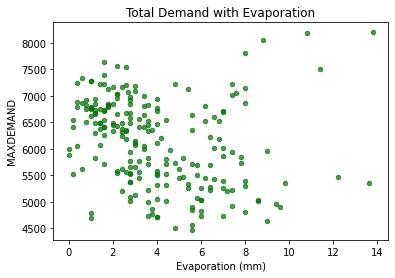

In [38]:

MergeData.plot.scatter (x = 'Evaporation (mm)',
                        y = 'MAXDEMAND',  title= "Total Demand with Evaporation",c = '#07700a', alpha = 0.7)

In [39]:
Linear = ['Evaporation (mm)','MAXDEMAND']
MergeData[Linear].corr(method = 'pearson')

,Evaporation (mm),MAXDEMAND
Evaporation (mm),1.000000,-0.245547
MAXDEMAND,-0.245547,1.000000


In [138]:
# get the max

myMax = max(max(MergeData['Evaporation (mm)']), max(MergeData['MAXDEMAND']))
myMax

8196.83

In [139]:
# get the min

myMin = min(min(MergeData['Evaporation (mm)']), max(MergeData['MAXDEMAND']))
myMin

0.0

### Detemine the impact of sunshne hours on enegy used.

<AxesSubplot:title={'center':'Impact of Sunshine on Temperature'}, xlabel='Sunshine (hours)', ylabel='Average_temp_/day(°C)'>

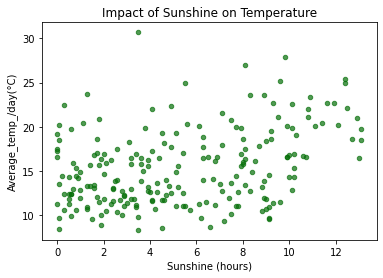

In [40]:
MergeData.plot.scatter (x = 'Sunshine (hours)',
                        y = 'Average_temp_/day(°C)', title = "Impact of Sunshine on Temperature",c = '#07700a', alpha = 0.7)

<AxesSubplot:title={'center':'Impact of Sunshine on Max_Demand'}, xlabel='Sunshine (hours)', ylabel='MAXDEMAND'>

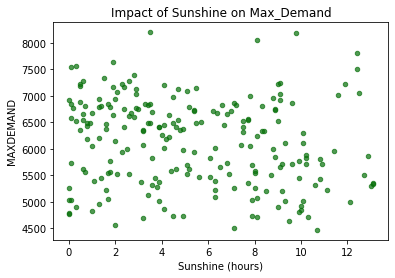

In [41]:
# 1.  sunshne data can be effective on solar energy.When the sunshine increases, the Total demand decreases. negatie linear graph.
MergeData.plot.scatter (x = 'Sunshine (hours)',
                        y = 'MAXDEMAND',  title = "Impact of Sunshine on Max_Demand",c = '#07700a', alpha = 0.7)

In [42]:
col = MergeData.loc[:, "Minimum temperature (°C)":"Maximum temperature (°C)"]
MergeData['avg_temp'] = col.mean(axis = 1)
MergeData

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),MAXDEMAND,Average_temp_/day(°C),avg_temp
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,1018.8,28.1,43,5,E,13,1015.3,5019.64,22.75,22.75
1,2021-01-02,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,1013.3,28.7,38,7,SW,4,1008.5,4964.35,23.70,23.70
2,2021-01-03,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,1007.7,23.5,59,4,SW,2,1005.2,4503.31,21.60,21.60
3,2021-01-04,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,1010.0,18.2,82,8,SW,17,1011.0,4764.18,17.30,17.30
4,2021-01-05,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,1012.5,18.2,82,8,SE,19,1013.3,4800.64,17.50,17.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2021-08-24,6.4,13.1,10.4,4.0,6.2,S,39,9:38,10.8,...,1021.5,11.7,55,6,S,17,1021.6,6717.65,9.75,9.75
214,2021-08-25,8.0,14.1,2.2,1.2,5.4,S,37,16:26,12.1,...,1023.3,13.4,59,6,SW,17,1021.8,6736.80,11.05,11.05
215,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39,13:14,9.1,...,1018.6,17.4,31,3,NW,24,1013.5,5716.32,11.55,11.55
216,2021-08-29,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,10.6,...,1011.4,12.8,84,7,S,6,1010.4,6227.89,12.65,12.65


In [43]:
# get the max

myMax = max(max(MergeData['Sunshine (hours)']), max(MergeData['MAXDEMAND']))
myMax

8196.83

In [44]:
# get the min

myMin = min(min(MergeData['Sunshine (hours)']), max(MergeData['MAXDEMAND']))
myMin

0.0

<AxesSubplot:title={'center':'Impact of Cloud Amount on Total Demand'}, xlabel='9am cloud amount (oktas)', ylabel='MAXDEMAND'>

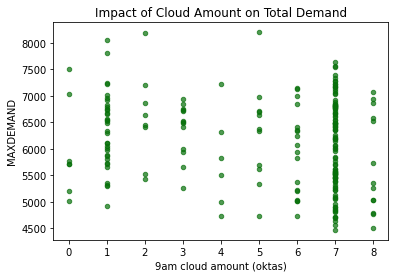

In [45]:
#but the sunshine can be affected by the amount of cloud
MergeData.plot.scatter (x = '9am cloud amount (oktas)',
                        y = 'MAXDEMAND',  title = "Impact of Cloud Amount on Total Demand",c = '#07700a', alpha = 0.7)

<AxesSubplot:title={'center':'How the Cloud Amount Will Impact On Sunshine'}, xlabel='Sunshine (hours)', ylabel='9am cloud amount (oktas)'>

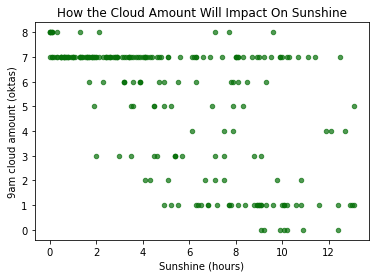

In [46]:
# Less sunshine may due to the cloud amount 
MergeData.plot.scatter (x = 'Sunshine (hours)',
                        y = '9am cloud amount (oktas)',  title = "How the Cloud Amount Will Impact On Sunshine",c = '#07700a', alpha = 0.7)

<AxesSubplot:title={'center':'How the Speed of maximum wind gust Will Impact On Total Demand'}, xlabel='Speed of maximum wind gust (km/h)', ylabel='MAXDEMAND'>

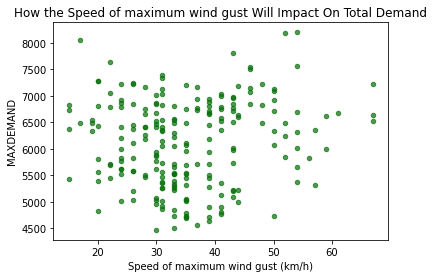

In [47]:
# 2.  Speed of maximum wind gust data can be effective on energy.
MergeData.plot.scatter (x = 'Speed of maximum wind gust (km/h)',
                        y = 'MAXDEMAND',  title = "How the Speed of maximum wind gust Will Impact On Total Demand",c = '#07700a', alpha = 0.7)

<AxesSubplot:title={'center':'Changing Pattern of Relative Humidity with Increasing Temperature'}, xlabel='Maximum temperature (°C)', ylabel='3pm relative humidity (%)'>

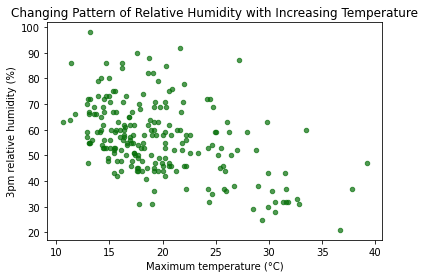

In [148]:
MergeData.plot.scatter (x = 'Maximum temperature (°C)',
                        y = '3pm relative humidity (%)', title = "Changing Pattern of Relative Humidity with Increasing Temperature",c = '#07700a', alpha = 0.7)

In [48]:
Linear = ['3pm relative humidity (%)','Maximum temperature (°C)']
MergeData[Linear].corr(method = 'pearson')


,3pm relative humidity (%),Maximum temperature (°C)
3pm relative humidity (%),1.000000,-0.475883
Maximum temperature (°C),-0.475883,1.000000


In [150]:
# get the max

myMax = max(max(MergeData['Maximum temperature (°C)']), max(MergeData['3pm relative humidity (%)']))
myMax

98

In [151]:
# get the min

myMin = min(min(MergeData['Maximum temperature (°C)']), max(MergeData['3pm relative humidity (%)']))
myMin

10.6

In [50]:
summer_start_date = '2020-12-01'
summer_end_date = '2021-02-28'
# Select DataFrame rows between two dates
mask = (MergeData['Date'] >= summer_start_date) & (MergeData['Date'] <= summer_end_date)
df_summer = MergeData.loc[mask]

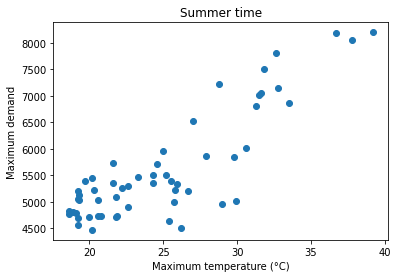

Pearson r is 0.851824052663924 in summer time


In [51]:
plt.scatter(df_summer['Maximum temperature (°C)'], df_summer['MAXDEMAND'])
plt.xlabel("Maximum temperature (°C)")
plt.ylabel("Maximum demand")
plt.title("Summer time")
plt.show()
print("Pearson r is",df_summer['Maximum temperature (°C)'].corr(df_summer['MAXDEMAND']),"in summer time")

In [52]:
winter_start_date = '2021-06-01'
winter_end_date = '2021-08-31'
# Select DataFrame rows between two dates
mask = (MergeData['Date'] >= winter_start_date) & (MergeData['Date'] <= winter_end_date)
df_winter = MergeData.loc[mask]
display(df_winter)



,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),MAXDEMAND,Average_temp_/day(°C),avg_temp
135,2021-06-01,5.7,15.7,0.0,4.0,1.3,N,39,11:32,9.2,...,1020.8,15.3,48,7,N,17,1019.4,6945.56,10.70,10.70
136,2021-06-02,9.2,19.6,0.0,3.2,7.7,NW,33,13:14,12.4,...,1018.8,19.0,44,5,N,11,1015.2,6564.70,14.40,14.40
137,2021-06-03,10.4,16.9,0.2,3.4,7.5,N,24,1:09,12.2,...,1015.1,16.7,62,5,SW,9,1012.9,6421.12,13.65,13.65
138,2021-06-04,10.0,13.6,2.0,1.2,2.0,S,37,15:23,10.9,...,1017.0,11.9,66,7,W,7,1018.5,6934.53,11.80,11.80
139,2021-06-05,3.8,12.9,0.0,1.4,3.5,N,52,14:43,6.7,...,1021.4,12.0,57,7,N,26,1017.6,6484.85,8.35,8.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2021-08-24,6.4,13.1,10.4,4.0,6.2,S,39,9:38,10.8,...,1021.5,11.7,55,6,S,17,1021.6,6717.65,9.75,9.75
214,2021-08-25,8.0,14.1,2.2,1.2,5.4,S,37,16:26,12.1,...,1023.3,13.4,59,6,SW,17,1021.8,6736.80,11.05,11.05
215,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39,13:14,9.1,...,1018.6,17.4,31,3,NW,24,1013.5,5716.32,11.55,11.55
216,2021-08-29,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,10.6,...,1011.4,12.8,84,7,S,6,1010.4,6227.89,12.65,12.65


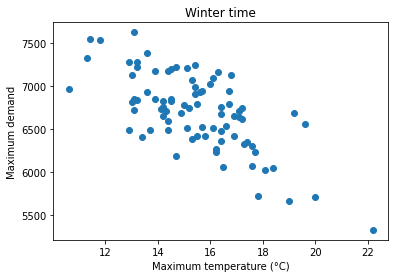

Pearson r is -0.6840476215969424 in winter time.


In [53]:
plt.scatter(df_winter['Maximum temperature (°C)'], df_winter['MAXDEMAND'])
plt.xlabel("Maximum temperature (°C)")
plt.ylabel("Maximum demand")
plt.title("Winter time")
plt.show()
print("Pearson r is",df_winter['Maximum temperature (°C)'].corr(df_winter['MAXDEMAND']),"in winter time.")

In [54]:
autumn_start_date = '2021-3-01'
autumn_end_date = '2021-5-31'
# Select DataFrame rows between two dates
mask = (MergeData['Date'] >= autumn_start_date) & (MergeData['Date'] <= autumn_end_date)
df_autumn = MergeData.loc[mask]
display(df_autumn)

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),MAXDEMAND,Average_temp_/day(°C),avg_temp
56,2021-03-01,13.8,21.7,0.0,6.4,6.3,S,44,18:35,16.6,...,1012.3,19.7,67,6,S,15,1012.2,5225.37,17.75,17.75
57,2021-03-02,13.3,18.1,0.0,6.2,1.4,SW,39,13:24,14.7,...,1018.1,17.0,44,7,SW,15,1018.6,5459.22,15.70,15.70
58,2021-03-03,14.2,17.7,0.0,4.4,2.1,SW,33,14:42,15.2,...,1020.0,17.3,54,7,S,13,1019.8,5526.41,15.95,15.95
59,2021-03-04,13.6,21.4,0.0,4.0,2.6,SW,35,22:37,15.3,...,1017.2,19.0,60,7,SW,7,1015.3,5528.66,17.50,17.50
60,2021-03-05,15.0,18.0,1.4,4.4,3.6,S,35,0:36,15.8,...,1015.1,17.1,53,7,SW,20,1015.7,5319.54,16.50,16.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2021-05-26,11.9,14.7,5.0,3.4,1.4,NW,39,5:45,13.1,...,1016.9,13.9,53,7,W,11,1019.7,6801.36,13.30,13.30
131,2021-05-27,9.8,15.0,0.4,1.6,0.6,W,33,14:15,11.3,...,1025.9,14.2,73,7,SW,11,1025.3,6551.00,12.40,12.40
132,2021-05-28,11.0,13.8,0.4,0.4,0.5,S,39,7:07,12.2,...,1031.8,12.7,59,7,S,11,1032.4,6887.79,12.40,12.40
133,2021-05-29,10.4,13.1,0.0,2.0,4.1,SE,26,14:41,11.3,...,1034.2,12.7,55,5,S,13,1032.3,6441.38,11.75,11.75


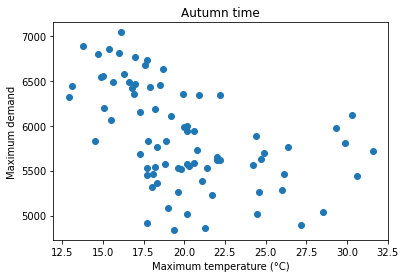

Pearson r is -0.4901407046489589 in winter time.


,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),MAXDEMAND,Average_temp_/day(°C),avg_temp
56,2021-03-01,13.8,21.7,0.0,6.4,6.3,S,44,18:35,16.6,...,1012.3,19.7,67,6,S,15,1012.2,5225.37,17.75,17.75
57,2021-03-02,13.3,18.1,0.0,6.2,1.4,SW,39,13:24,14.7,...,1018.1,17.0,44,7,SW,15,1018.6,5459.22,15.70,15.70
58,2021-03-03,14.2,17.7,0.0,4.4,2.1,SW,33,14:42,15.2,...,1020.0,17.3,54,7,S,13,1019.8,5526.41,15.95,15.95
59,2021-03-04,13.6,21.4,0.0,4.0,2.6,SW,35,22:37,15.3,...,1017.2,19.0,60,7,SW,7,1015.3,5528.66,17.50,17.50
60,2021-03-05,15.0,18.0,1.4,4.4,3.6,S,35,0:36,15.8,...,1015.1,17.1,53,7,SW,20,1015.7,5319.54,16.50,16.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2021-05-26,11.9,14.7,5.0,3.4,1.4,NW,39,5:45,13.1,...,1016.9,13.9,53,7,W,11,1019.7,6801.36,13.30,13.30
131,2021-05-27,9.8,15.0,0.4,1.6,0.6,W,33,14:15,11.3,...,1025.9,14.2,73,7,SW,11,1025.3,6551.00,12.40,12.40
132,2021-05-28,11.0,13.8,0.4,0.4,0.5,S,39,7:07,12.2,...,1031.8,12.7,59,7,S,11,1032.4,6887.79,12.40,12.40
133,2021-05-29,10.4,13.1,0.0,2.0,4.1,SE,26,14:41,11.3,...,1034.2,12.7,55,5,S,13,1032.3,6441.38,11.75,11.75


In [55]:
plt.scatter(df_autumn['Maximum temperature (°C)'], df_autumn['MAXDEMAND'])
plt.xlabel("Maximum temperature (°C)")
plt.ylabel("Maximum demand")
plt.title("Autumn time")
plt.show()
print("Pearson r is",df_autumn['Maximum temperature (°C)'].corr(df_autumn['MAXDEMAND']),"in winter time.")
df_autumn

## QUESTION1

## Linear Regression
A model which predicts the maximum daily energy usage based on the provided weather data.

In [56]:
##  Evaluation
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = MergeData[['Average_temp_/day(°C)']]
y = MergeData['MAXDEMAND']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


# initialise the model
lm = linear_model.LinearRegression()


#model = lm.fit(X_train, y_train)

model = lm.fit(X_train , y_train)

y_test_predictions = lm.predict(X_test)

print('actual MAXDEMAND values of the first 5 test data:')
print(y_test[0:5])
print('')
print('predicted MAXDEMAND values of the first 5 test data:')
print(y_test_predictions[0:5])
print('')

# coefficients

print('Coefficients: ', end = ' ')
print(lm.coef_)
print('')

# intercept:
print('Intercept: ', end = ' ')
print(lm.intercept_)
print('')

# R^2
r2_test = lm.score(X_test, y_test)
r2_train = lm.score(X_train, y_train)

print('Coefficient of determination (test): {0:.2f}'.format(r2_test))
print('Coefficient of determination (training): {0:.2f}'.format(r2_train))


actual MAXDEMAND values of the first 5 test data:
100    5937.22
215    5716.32
139    6484.85
178    7556.79
15     4473.05
Name: MAXDEMAND, dtype: float64

predicted MAXDEMAND values of the first 5 test data:
[6054.59916483 6351.45466769 6551.44153278 6407.7009735  6038.975191  ]

Coefficients:  [-62.49589534]

Intercept:  7073.2822588658555

Coefficient of determination (test): 0.25
Coefficient of determination (training): 0.10


In [58]:
"""
Coefficient of determination (test): 0.10
Coefficient of determination (training): 0.03 

Coefficient is very low. the Maximum temperature and MAXDEMAND plot's is U shape and linear
regression is not right choice to find a model between them,so we should choose another variable.

we can consider absolute diffrence's between average temperature and 20 (°C) instead of Maximum temperature.

20 (°C) is ideal temperature and the demand is minimum in 20 (°C).

"""

"\nCoefficient of determination (test): 0.10\nCoefficient of determination (training): 0.03 \n\nCoefficient is very low. the Maximum temperature and MAXDEMAND plot's is U shape and linear\nregression is not right choice to find a model between them,so we should choose another variable.\n\nwe can consider absolute diffrence's between average temperature and 20 (°C) instead of Maximum temperature.\n\n20 (°C) is ideal temperature and the demand is minimum in 20 (°C).\n\n"

In [57]:
# Diff daily temperature

temp = MergeData.loc[:, "Average_temp_/day(°C)"]
MergeData['Diff_temp_/day(°C)'] = abs(20-temp)
display(MergeData.head())


,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),MAXDEMAND,Average_temp_/day(°C),avg_temp,Diff_temp_/day(°C)
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,28.1,43,5,E,13,1015.3,5019.64,22.75,22.75,2.75
1,2021-01-02,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,28.7,38,7,SW,4,1008.5,4964.35,23.70,23.70,3.70
2,2021-01-03,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,23.5,59,4,SW,2,1005.2,4503.31,21.60,21.60,1.60
3,2021-01-04,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,18.2,82,8,SW,17,1011.0,4764.18,17.30,17.30,2.70
4,2021-01-05,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,18.2,82,8,SE,19,1013.3,4800.64,17.50,17.50,2.50


<AxesSubplot:xlabel='Diff_temp_/day(°C)', ylabel='MAXDEMAND'>

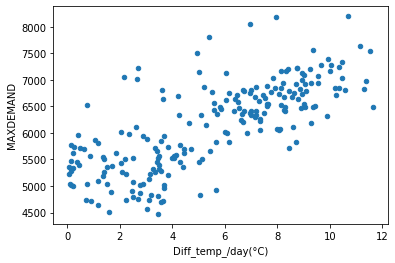

In [58]:
# Linear graph
MergeData.plot.scatter (x = 'Diff_temp_/day(°C)',
                        y = 'MAXDEMAND')


In [61]:
#The plot between MAXDEMAND and Diff_temp_/day(°C) is almost linear.

Text(0.5, 1.0, 'Corrilation Map to explain the strength of relationship')

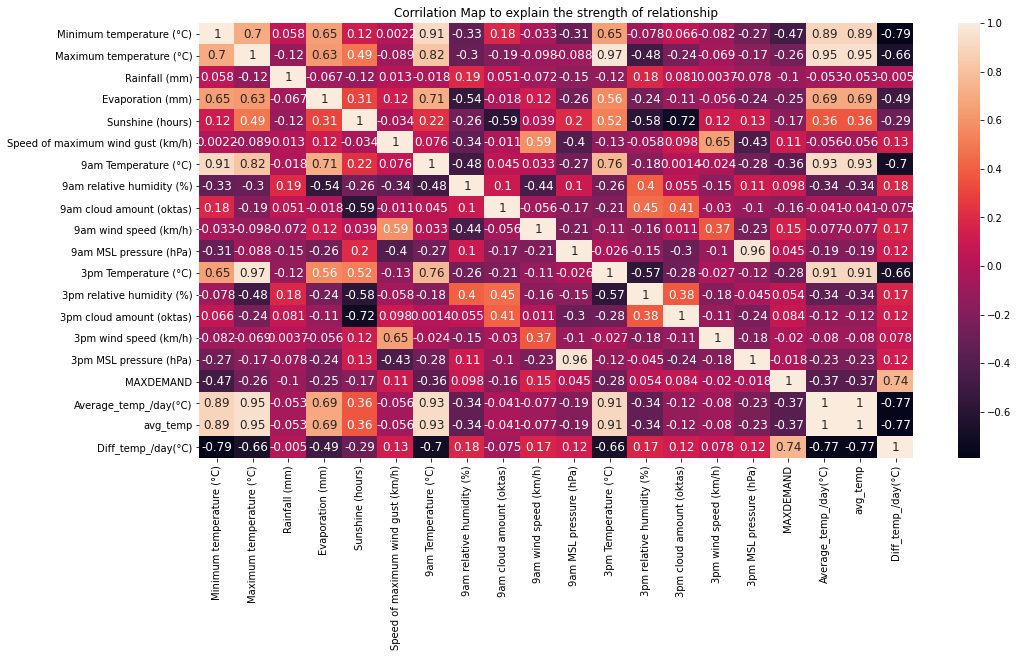

In [59]:
# Corrilarion values- Strong positive corrilations has light colour, negative corrilations has dark colour.
plt.figure(figsize = (16,8))
sns.heatmap(MergeData.corr(), annot = True, annot_kws = {"size":12})

plt.title("Corrilation Map to explain the strength of relationship")
#sns.heatmap(MergeData, annot=True, fmt=".lf", linewidth=5, square=True, cmap='Blues_r')


In [63]:
# Correlation between MAXDEMAND and Diff_temp_/day(°C) is 74%.
# that shows strong relationship.

In [60]:
##  Evaluation
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = MergeData[['Diff_temp_/day(°C)']]
y = MergeData['MAXDEMAND']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)


# initialise the model
lm = linear_model.LinearRegression()


#model = lm.fit(X_train, y_train)

model = lm.fit(X_train , y_train)

y_test_predictions = lm.predict(X_test)

#Evaluation
#print(mean_squared_error(y_test,y_pred))
#print(r2_score((y_test,y_pred))
print('actual MAXDEMAND values of the first 5 test data:')
print(y_test[0:5])
print('')
print('predicted MAXDEMAND values of the first 5 test data:')
print(y_test_predictions[0:5])
print('')

# coefficients

print('Coefficients: ', end = ' ')
print(lm.coef_)
print('')

# intercept:
print('Intercept: ', end = ' ')
print(lm.intercept_)
print('')

# R^2
r2_test = lm.score(X_test, y_test)
r2_train = lm.score(X_train, y_train)

print('Coefficient of determination (test): {0:.2f}'.format(r2_test))
print('Coefficient of determination (training): {0:.2f}'.format(r2_train))



actual MAXDEMAND values of the first 5 test data:
100    5937.22
215    5716.32
139    6484.85
178    7556.79
15     4473.05
Name: MAXDEMAND, dtype: float64

predicted MAXDEMAND values of the first 5 test data:
[5789.65278368 6714.49400903 7337.54493978 6889.7270833  5740.97692972]

Coefficients:  [194.70341586]

Intercept:  5069.250144994686

Coefficient of determination (test): 0.53
Coefficient of determination (training): 0.56


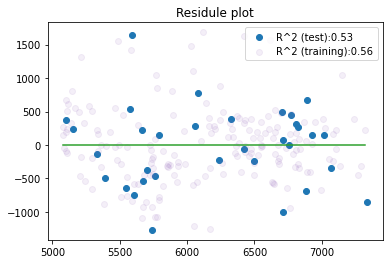

In [61]:
## Plot the residuals for the test data as well as the training data of the model.

##Include legends in the scatter plot; include the Coefficient of Determination for each legend.

import matplotlib.pyplot as plt
# Plot residules


y_test_h = lm.predict(X_test)
y_train_h = lm.predict(X_train)

residual_train = [y - yh for y, yh in zip(y_train, y_train_h)]
residual_test = [y - yh for y, yh in zip(y_test, y_test_h)]

plt.scatter(y_test_h, residual_test, color='C0', label = 'R^2 (test):{0:.2f}'.format(r2_test))
plt.scatter(y_train_h, residual_train, color='C4', alpha = 0.1, label = 'R^2 (training):{0:.2f}'.format(r2_train))
plt.plot([min(y_train_h), max(y_train_h)], [0,0], color = 'C2')
plt.legend()
plt.title("Residule plot")
plt.show()


In [62]:
#Fit another linear model using all variables to predict MAXDEMAND.

#Compare the results with the previous model.


X = MergeData[['Diff_temp_/day(°C)']]
y = MergeData['MAXDEMAND']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, train_size = 0.90, random_state = 42)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

# coefficients

print('Coefficients: ', end = ' ')
print(lm.coef_)
print('')

# intercept:
print('Intercept: ', end = ' ')
print(lm.intercept_)
print('')

# R^2
r2_test = lm.score(X_test, y_test)
r2_train = lm.score(X_train, y_train)

print('Coefficient of determination (test): {0:.2f}'.format(r2_test))
print('Coefficient of determination (training): {0:.2f}'.format(r2_train))



Coefficients:  [192.5643243]

Intercept:  5082.598459856963

Coefficient of determination (test): 0.56
Coefficient of determination (training): 0.55


In [165]:
# Comparing two models: 
# Both models are almost same variance in MAXDEMAND.   From 56% to 55% Variance.


## Determine maximum daily energy uses Model accuracy by kNN method

In [63]:
# Binning maximum energy used. 

def bin_rating(x):
    """
   Equal length descritisation.
    
        [min, 4080.605), [4080.605, 5452.68), [5452.68, 6824.755 ) [6824.755, max]
        
        min = 2708.53
        max = 8196.83

    
    """
    LOWER = 4080.605

    MID = 5452.68
    
    UPPER = 6824.755

    
    # [min, 4080.605)
    if x < LOWER:        
        return 1
    
    #  [4080.605, 5452.68)
    elif LOWER <= x < MID:
        return 2 
    
    #  [5452.68, 6824.755 ) 
   
    elif MID <= x < UPPER:
        return 3

   #[6824.755, max]
    return 4

# apply the function on the series
MergeData['bin_rating'] = MergeData['MAXDEMAND'].apply(bin_rating)

# also, print out the min/max for this feature
MergeData

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),MAXDEMAND,Average_temp_/day(°C),avg_temp,Diff_temp_/day(°C),bin_rating
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,43,5,E,13,1015.3,5019.64,22.75,22.75,2.75,2
1,2021-01-02,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,38,7,SW,4,1008.5,4964.35,23.70,23.70,3.70,2
2,2021-01-03,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,59,4,SW,2,1005.2,4503.31,21.60,21.60,1.60,2
3,2021-01-04,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,82,8,SW,17,1011.0,4764.18,17.30,17.30,2.70,2
4,2021-01-05,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,82,8,SE,19,1013.3,4800.64,17.50,17.50,2.50,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2021-08-24,6.4,13.1,10.4,4.0,6.2,S,39,9:38,10.8,...,55,6,S,17,1021.6,6717.65,9.75,9.75,10.25,3
214,2021-08-25,8.0,14.1,2.2,1.2,5.4,S,37,16:26,12.1,...,59,6,SW,17,1021.8,6736.80,11.05,11.05,8.95,3
215,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39,13:14,9.1,...,31,3,NW,24,1013.5,5716.32,11.55,11.55,8.45,3
216,2021-08-29,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,10.6,...,84,7,S,6,1010.4,6227.89,12.65,12.65,7.35,3


In [64]:
features = MergeData[['Minimum temperature (°C)','Maximum temperature (°C)','Rainfall (mm)','Evaporation (mm)','Sunshine (hours)']]
classlabel = MergeData['bin_rating']

features_train, features_test, class_train, class_test = train_test_split(features, classlabel, train_size = 0.8, test_size = 0.2, random_state = 42)

scaler = preprocessing.StandardScaler().fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(features_train, class_train)

predictions = knn.predict(features_test)
print("Model accuracy scores by kNN method:",accuracy_score(class_test, predictions))

Model accuracy scores by kNN method: 0.7272727272727273


## Model accuracy by K-fold method

In [65]:
from sklearn.model_selection import KFold

k = 10
kf = KFold(n_splits = k, shuffle = True, random_state = 42)
accuracy_scores = []

for train_index, test_index in kf.split(MergeData):
    features_train = features.iloc[train_index, :]
    features_test = features.iloc[test_index, :]
    
    class_train = classlabel[train_index]
    class_test = classlabel[test_index]
    
    scaler = preprocessing.StandardScaler().fit(features_train)
    features_train = scaler.transform(features_train)
    features_test = scaler.transform(features_test)

    knn = neighbors.KNeighborsClassifier(n_neighbors=5)
    knn.fit(features_train, class_train)
    
    predictions = knn.predict(features_test)
    accuracy_scores.append(accuracy_score(class_test, predictions))
    
    
print(accuracy_scores)
print("Model accuracy scores by K-Fold:", sum(accuracy_scores)/k)

[0.7272727272727273, 0.6818181818181818, 0.4090909090909091, 0.5, 0.7272727272727273, 0.7727272727272727, 0.6818181818181818, 0.5909090909090909, 0.5714285714285714, 0.6190476190476191]
Model accuracy scores by K-Fold: 0.6281385281385281


# Second model: Maximum daily price category based on weather data

In [ ]:
#................................Question 2 explained...............................................................................................

In [66]:
Data_p

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,Time
0,VIC1,1/01/2021 0:30,4179.21,LOW,2021-01-01,00:30:00
1,VIC1,1/01/2021 1:00,4047.76,LOW,2021-01-01,01:00:00
2,VIC1,1/01/2021 1:30,3934.70,LOW,2021-01-01,01:30:00
3,VIC1,1/01/2021 2:00,3766.45,LOW,2021-01-01,02:00:00
4,VIC1,1/01/2021 2:30,3590.37,LOW,2021-01-01,02:30:00
...,...,...,...,...,...,...
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM,2021-08-31,22:00:00
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM,2021-08-31,22:30:00
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM,2021-08-31,23:00:00
11662,VIC1,31/08/2021 23:30,4834.00,MEDIUM,2021-08-31,23:30:00


In [67]:
MergeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 217
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               218 non-null    datetime64[ns]
 1   Minimum temperature (°C)           218 non-null    float64       
 2   Maximum temperature (°C)           218 non-null    float64       
 3   Rainfall (mm)                      218 non-null    float64       
 4   Evaporation (mm)                   218 non-null    float64       
 5   Sunshine (hours)                   218 non-null    float64       
 6   Direction of maximum wind gust     218 non-null    object        
 7   Speed of maximum wind gust (km/h)  218 non-null    int64         
 8   Time of maximum wind gust          218 non-null    object        
 9   9am Temperature (°C)               218 non-null    float64       
 10  9am relative humidity (%)          218

In [69]:
from sklearn.metrics.cluster import normalized_mutual_info_score

MergeData['max_temp_binned'] = pd.cut(MergeData['Maximum temperature (°C)'], bins=4)
MergeData['demand_binned'] = pd.cut(MergeData['MAXDEMAND'], bins = 4)
display(MergeData)
nmi = normalized_mutual_info_score(MergeData['demand_binned'],MergeData['max_temp_binned'], average_method = 'min')
print("NMI : "+ str(nmi))

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),MAXDEMAND,Average_temp_/day(°C),avg_temp,Diff_temp_/day(°C),bin_rating,max_temp_binned,demand_binned
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,E,13,1015.3,5019.64,22.75,22.75,2.75,2,"(24.9, 32.05]","(4469.326, 5403.995]"
1,2021-01-02,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,SW,4,1008.5,4964.35,23.70,23.70,3.70,2,"(24.9, 32.05]","(4469.326, 5403.995]"
2,2021-01-03,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,SW,2,1005.2,4503.31,21.60,21.60,1.60,2,"(24.9, 32.05]","(4469.326, 5403.995]"
3,2021-01-04,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,SW,17,1011.0,4764.18,17.30,17.30,2.70,2,"(17.75, 24.9]","(4469.326, 5403.995]"
4,2021-01-05,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,SE,19,1013.3,4800.64,17.50,17.50,2.50,2,"(17.75, 24.9]","(4469.326, 5403.995]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2021-08-24,6.4,13.1,10.4,4.0,6.2,S,39,9:38,10.8,...,S,17,1021.6,6717.65,9.75,9.75,10.25,3,"(10.571, 17.75]","(6334.94, 7265.885]"
214,2021-08-25,8.0,14.1,2.2,1.2,5.4,S,37,16:26,12.1,...,SW,17,1021.8,6736.80,11.05,11.05,8.95,3,"(10.571, 17.75]","(6334.94, 7265.885]"
215,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39,13:14,9.1,...,NW,24,1013.5,5716.32,11.55,11.55,8.45,3,"(17.75, 24.9]","(5403.995, 6334.94]"
216,2021-08-29,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,10.6,...,S,6,1010.4,6227.89,12.65,12.65,7.35,3,"(10.571, 17.75]","(5403.995, 6334.94]"


NMI : 0.32508594193182894


In [70]:
def bin_rating(x):
    """
   Equal length descritisation.
    
        [min, 4080.605), [4080.605, 5452.68), [5452.68, 6824.755 ) [6824.755, max]
        
        min = 2708.53
        max = 8196.83

    
    """
    LOWER = 4080.605

    MID = 5452.68
    
    UPPER = 6824.755

    
    # [min, 4080.605)
    if x < LOWER:        
        return 1
    
    #  [4080.605, 5452.68)
    elif LOWER <= x < MID:
        return 2 
    
    #  [5452.68, 6824.755 ) 
   
    elif MID <= x < UPPER:
        return 3

   #[6824.755, max]
    return 4

# apply the function on the series
MergeData['bin_rating'] = MergeData['MAXDEMAND'].apply(bin_rating)

# also, print out the min/max for this feature
MergeData

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),MAXDEMAND,Average_temp_/day(°C),avg_temp,Diff_temp_/day(°C),bin_rating,max_temp_binned,demand_binned
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,E,13,1015.3,5019.64,22.75,22.75,2.75,2,"(24.9, 32.05]","(4469.326, 5403.995]"
1,2021-01-02,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,SW,4,1008.5,4964.35,23.70,23.70,3.70,2,"(24.9, 32.05]","(4469.326, 5403.995]"
2,2021-01-03,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,SW,2,1005.2,4503.31,21.60,21.60,1.60,2,"(24.9, 32.05]","(4469.326, 5403.995]"
3,2021-01-04,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,SW,17,1011.0,4764.18,17.30,17.30,2.70,2,"(17.75, 24.9]","(4469.326, 5403.995]"
4,2021-01-05,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,SE,19,1013.3,4800.64,17.50,17.50,2.50,2,"(17.75, 24.9]","(4469.326, 5403.995]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2021-08-24,6.4,13.1,10.4,4.0,6.2,S,39,9:38,10.8,...,S,17,1021.6,6717.65,9.75,9.75,10.25,3,"(10.571, 17.75]","(6334.94, 7265.885]"
214,2021-08-25,8.0,14.1,2.2,1.2,5.4,S,37,16:26,12.1,...,SW,17,1021.8,6736.80,11.05,11.05,8.95,3,"(10.571, 17.75]","(6334.94, 7265.885]"
215,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39,13:14,9.1,...,NW,24,1013.5,5716.32,11.55,11.55,8.45,3,"(17.75, 24.9]","(5403.995, 6334.94]"
216,2021-08-29,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,10.6,...,S,6,1010.4,6227.89,12.65,12.65,7.35,3,"(10.571, 17.75]","(5403.995, 6334.94]"


In [71]:
Data_p['PRICECATEGORY'].value_counts()


LOW        7570
MEDIUM     3061
HIGH        777
EXTREME     256
Name: PRICECATEGORY, dtype: int64

In [72]:
display(Data_p.head())

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,Time
0,VIC1,1/01/2021 0:30,4179.21,LOW,2021-01-01,00:30:00
1,VIC1,1/01/2021 1:00,4047.76,LOW,2021-01-01,01:00:00
2,VIC1,1/01/2021 1:30,3934.70,LOW,2021-01-01,01:30:00
3,VIC1,1/01/2021 2:00,3766.45,LOW,2021-01-01,02:00:00
4,VIC1,1/01/2021 2:30,3590.37,LOW,2021-01-01,02:30:00


In [73]:
# In this function we want to find the maximum daily price category.
def bin_grade(x):

 
    if x == 'LOW':        
        return 1
    
    elif x == 'MEDIUM':
        return 2 
    
    elif x == 'HIGH':
        return 3

      
    elif x == 'EXTREME':
        return 4

# apply the function on the series
Data_p['Price_bin_grade'] = Data_p['PRICECATEGORY'].apply(bin_grade)

Data_p

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,Time,Price_bin_grade
0,VIC1,1/01/2021 0:30,4179.21,LOW,2021-01-01,00:30:00,1
1,VIC1,1/01/2021 1:00,4047.76,LOW,2021-01-01,01:00:00,1
2,VIC1,1/01/2021 1:30,3934.70,LOW,2021-01-01,01:30:00,1
3,VIC1,1/01/2021 2:00,3766.45,LOW,2021-01-01,02:00:00,1
4,VIC1,1/01/2021 2:30,3590.37,LOW,2021-01-01,02:30:00,1
...,...,...,...,...,...,...,...
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM,2021-08-31,22:00:00,2
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM,2021-08-31,22:30:00,2
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM,2021-08-31,23:00:00,2
11662,VIC1,31/08/2021 23:30,4834.00,MEDIUM,2021-08-31,23:30:00,2


In [74]:
#Now make them as groups and find the the maximum daily price category
Data_p2 = Data_p.groupby("Date").max("Price_bin_grade")
Data_p2

,TOTALDEMAND,Price_bin_grade
Date,,
2021-01-01,5019.64,1
2021-01-02,4964.35,1
2021-01-03,4503.31,1
2021-01-04,4764.18,1
2021-01-05,4800.64,1
...,...,...
2021-08-28,5716.32,2
2021-08-29,6227.89,4
2021-08-30,6072.91,3


In [75]:
# Turning 1,2,3,4 to LOW, MEIUM, HIGH, EXTEREM

def maximum_daily_price(x):

 
    if x == 1 :        
        return 'LOW'
    
    elif x == 2:
        return 'MEDIUM' 
    
    elif x == 3:
        return 'HIGH'

      
    elif x == 4:
        return 'EXTREME'

# apply the function on the series
Data_p2['maximum_daily_price_category'] = Data_p2['Price_bin_grade'].apply(maximum_daily_price)

Data_p2

,TOTALDEMAND,Price_bin_grade,maximum_daily_price_category
Date,,,
2021-01-01,5019.64,1,LOW
2021-01-02,4964.35,1,LOW
2021-01-03,4503.31,1,LOW
2021-01-04,4764.18,1,LOW
2021-01-05,4800.64,1,LOW
...,...,...,...
2021-08-28,5716.32,2,MEDIUM
2021-08-29,6227.89,4,EXTREME
2021-08-30,6072.91,3,HIGH


In [77]:
# Merged dataset into a dataframe assigned as MergeData2

MergeData2 = MergeData.merge(Data_p2, how = 'inner', on = 'Date') 
MergeData2

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,MAXDEMAND,Average_temp_/day(°C),avg_temp,Diff_temp_/day(°C),bin_rating,max_temp_binned,demand_binned,TOTALDEMAND,Price_bin_grade,maximum_daily_price_category
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,5019.64,22.75,22.75,2.75,2,"(24.9, 32.05]","(4469.326, 5403.995]",5019.64,1,LOW
1,2021-01-02,18.4,29.0,0.0,9.4,1.3,NW,30,8:22,23.3,...,4964.35,23.70,23.70,3.70,2,"(24.9, 32.05]","(4469.326, 5403.995]",4964.35,1,LOW
2,2021-01-03,17.0,26.2,12.6,4.8,7.1,SW,33,17:55,18.3,...,4503.31,21.60,21.60,1.60,2,"(24.9, 32.05]","(4469.326, 5403.995]",4503.31,1,LOW
3,2021-01-04,16.0,18.6,2.6,3.8,0.0,SE,41,16:03,16.2,...,4764.18,17.30,17.30,2.70,2,"(17.75, 24.9]","(4469.326, 5403.995]",4764.18,1,LOW
4,2021-01-05,15.9,19.1,11.2,1.0,0.0,SE,35,11:02,17.2,...,4800.64,17.50,17.50,2.50,2,"(17.75, 24.9]","(4469.326, 5403.995]",4800.64,1,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2021-08-24,6.4,13.1,10.4,4.0,6.2,S,39,9:38,10.8,...,6717.65,9.75,9.75,10.25,3,"(10.571, 17.75]","(6334.94, 7265.885]",6717.65,3,HIGH
214,2021-08-25,8.0,14.1,2.2,1.2,5.4,S,37,16:26,12.1,...,6736.80,11.05,11.05,8.95,3,"(10.571, 17.75]","(6334.94, 7265.885]",6736.80,4,EXTREME
215,2021-08-28,5.3,17.8,0.0,1.6,9.6,N,39,13:14,9.1,...,5716.32,11.55,11.55,8.45,3,"(17.75, 24.9]","(5403.995, 6334.94]",5716.32,2,MEDIUM
216,2021-08-29,9.1,16.2,0.6,6.4,4.3,NE,33,1:50,10.6,...,6227.89,12.65,12.65,7.35,3,"(10.571, 17.75]","(5403.995, 6334.94]",6227.89,4,EXTREME


In [78]:
MergeData2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 217
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               218 non-null    datetime64[ns]
 1   Minimum temperature (°C)           218 non-null    float64       
 2   Maximum temperature (°C)           218 non-null    float64       
 3   Rainfall (mm)                      218 non-null    float64       
 4   Evaporation (mm)                   218 non-null    float64       
 5   Sunshine (hours)                   218 non-null    float64       
 6   Direction of maximum wind gust     218 non-null    object        
 7   Speed of maximum wind gust (km/h)  218 non-null    int64         
 8   Time of maximum wind gust          218 non-null    object        
 9   9am Temperature (°C)               218 non-null    float64       
 10  9am relative humidity (%)          218

In [79]:
FEATURES = ['Price_bin_grade','MAXDEMAND','Minimum temperature (°C)','Maximum temperature (°C)','Sunshine (hours)','Speed of maximum wind gust (km/h)'
         ,'9am Temperature (°C)','3pm Temperature (°C)','Average_temp_/day(°C)']
MergeData2[FEATURES].corr(method = 'pearson')

,Price_bin_grade,MAXDEMAND,Minimum temperature (°C),Maximum temperature (°C),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),3pm Temperature (°C),Average_temp_/day(°C)
Price_bin_grade,1.000000,0.674527,-0.577635,-0.498794,-0.291782,-0.129291,-0.539630,-0.499469,-0.574113
MAXDEMAND,0.674527,1.000000,-0.473554,-0.255099,-0.168017,0.110848,-0.359269,-0.282463,-0.372465
Minimum temperature (°C),-0.577635,-0.473554,1.000000,0.701584,0.117211,0.002160,0.910744,0.654199,0.890526
Maximum temperature (°C),-0.498794,-0.255099,0.701584,1.000000,0.489657,-0.088700,0.818239,0.966990,0.948958
Sunshine (hours),-0.291782,-0.168017,0.117211,0.489657,1.000000,-0.034018,0.224974,0.518218,0.364489
Speed of maximum wind gust (km/h),-0.129291,0.110848,0.002160,-0.088700,-0.034018,1.000000,0.075885,-0.133549,-0.055672
9am Temperature (°C),-0.539630,-0.359269,0.910744,0.818239,0.224974,0.075885,1.000000,0.758206,0.925495
3pm Temperature (°C),-0.499469,-0.282463,0.654199,0.966990,0.518218,-0.133549,0.758206,1.000000,0.906910
Average_temp_/day(°C),-0.574113,-0.372465,0.890526,0.948958,0.364489,-0.055672,0.925495,0.906910,1.000000


### Determined the maximum daily price variation during different session in a year

Pearson r is  0.48542269828978096 in summer time
Pearson r is  -0.3805427669950389 in Autumn time
Pearson r is  -0.3088149448686937 in winter time
Pearson r is  -0.49879369215508296 Overall_year


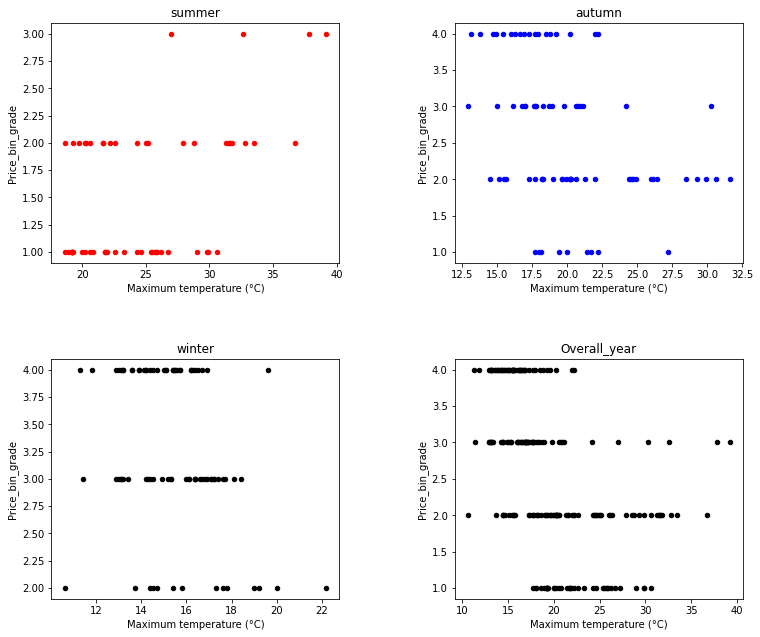

In [80]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

ax1 = axes[0][0]
summer_start = '2020-12-01'
summer_end =  '2021-02-28'
summer = MergeData2.loc[(MergeData2['Date'] >= summer_start) & (MergeData2['Date'] <= summer_end)]
summer.plot.scatter (x = 'Maximum temperature (°C)', y = 'Price_bin_grade', title = "summer", ax = ax1, lw = 1, c = 'r')
print("Pearson r is ",summer['Maximum temperature (°C)'].corr(summer['Price_bin_grade']), "in summer time")


ax2 = axes[0][1]
autumn_start = '2021-3-01'
autumn_end = '2021-5-31'
autumn = MergeData2.loc[(MergeData2['Date'] >= autumn_start) & (MergeData2['Date'] <= autumn_end)]
autumn.plot.scatter (x = 'Maximum temperature (°C)', y = 'Price_bin_grade',title = "autumn", ax = ax2, lw = 1, c = 'b')
print("Pearson r is ",autumn['Maximum temperature (°C)'].corr(autumn['Price_bin_grade']), "in Autumn time")


ax3 = axes[1][0]
winter_start = '2021-06-01'
winter_end = '2021-08-31'
winter = MergeData2.loc[(MergeData2['Date'] >= '2021-06-01') & (MergeData2['Date'] <= '2021-08-31') ]
winter.plot.scatter (x = 'Maximum temperature (°C)', y = 'Price_bin_grade',title = "winter", ax = ax3, lw = 1, c = 'k')
print("Pearson r is ",winter['Maximum temperature (°C)'].corr(winter['Price_bin_grade']), "in winter time")

ax4 = axes[1][1]
Day_start = '2020-01-01'
Day_end = '2021-08-31'
Overall = MergeData2.loc[(MergeData2['Date'] >= '2021-01-01') & (MergeData2['Date'] <= '2021-08-31') ]
Overall.plot.scatter (x = 'Maximum temperature (°C)', y = 'Price_bin_grade',title="Overall_year", ax = ax4, lw = 1, c = 'k')
print("Pearson r is ",Overall['Maximum temperature (°C)'].corr(Overall['Price_bin_grade']), "Overall_year")


plt.subplots_adjust(left = 0.1,bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.4, hspace = 0.4)
plt.show()

### Linear Regression
A model which predicts the maximum daily price category based on demand.

In [81]:
##  Evaluation
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = MergeData2[['TOTALDEMAND']]
y = MergeData2['Price_bin_grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


# initialise the model
lm = linear_model.LinearRegression()


#model = lm.fit(X_train, y_train)

model = lm.fit(X_train , y_train)

y_test_predictions = lm.predict(X_test)

print('actual MAXDEMAND values of the first 10 test data:')
print(y_test[0:10])
print('')
print('predicted MAXDEMAND values of the first 10 test data:')
print(y_test_predictions[0:10])
print('')

# coefficients

print('Coefficients: ', end = ' ')
print(lm.coef_)
print('')

# intercept:
print('Intercept: ', end = ' ')
print(lm.intercept_)
print('')

# R^2
r2_test = lm.score(X_test, y_test)
r2_train = lm.score(X_train, y_train)

print('Coefficient of determination (test): {0:.2f}'.format(r2_test))
print('Coefficient of determination (training): {0:.2f}'.format(r2_train))


actual MAXDEMAND values of the first 10 test data:
100    3
215    2
139    3
178    3
15     2
154    4
170    3
73     2
207    4
140    4
Name: Price_bin_grade, dtype: int64

predicted MAXDEMAND values of the first 10 test data:
[2.37984416 2.17770422 2.88096637 3.86187124 1.04001965 3.50138682
 3.43929902 1.94963107 3.15891107 2.61325219]

Coefficients:  [0.00091507]

Intercept:  -3.0531539866184696

Coefficient of determination (test): 0.25
Coefficient of determination (training): 0.51


### Determine correlation among the dataset by heatmap

Text(0.5, 1.0, 'Corrilation Map to explain the strength of relationship')

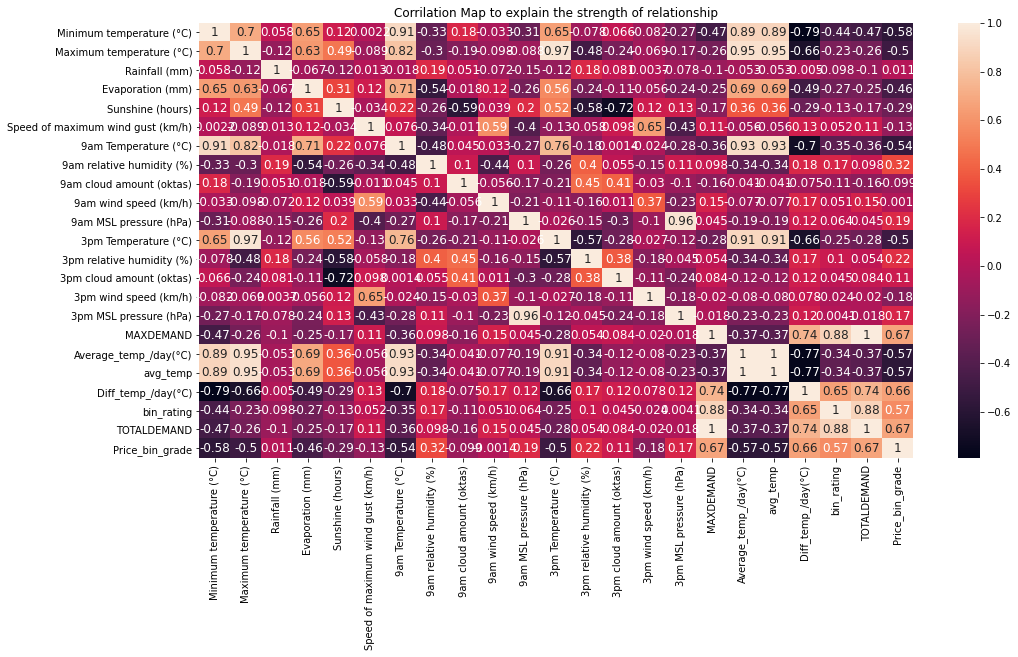

In [82]:
# correlation values- Strong positive correlation has light colour, negative correlation has dark colour.
plt.figure(figsize = (16,8))
sns.heatmap(MergeData2.corr(), annot = True, annot_kws = {"size":12})

plt.title("Corrilation Map to explain the strength of relationship")
#sns.heatmap(MergeData, annot=True, fmt=".lf", linewidth=5, square=True, cmap='Blues_r')

### kNN test for model accuracy scores

In [83]:
##get just the features
features = MergeData2[['Minimum temperature (°C)','Maximum temperature (°C)','Sunshine (hours)','Evaporation (mm)'
                  ,'Speed of maximum wind gust (km/h)']].astype(float)

##get just the class labels
classlabel = MergeData2['Price_bin_grade']

##randomly select 66% of the instances to be training and the rest to be testing
features_train, features_test, class_train, class_test = train_test_split(features, classlabel, train_size = 0.8, test_size = 0.2, random_state = 42)

#normalise the data to have 0 mean and unit variance using the library functions.  This will help for later
#computation of distances between instances
scaler = preprocessing.StandardScaler().fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(features_train, class_train)

# We compare our prediction with the actual class label and report the overall accuracy.
predictions = knn.predict(features_test)
print("Model accuracy scores by kNN method:",accuracy_score(class_test, predictions))

Model accuracy scores by kNN method: 0.4772727272727273


In [86]:
##get just the features

data = MergeData2[['Minimum temperature (°C)','Maximum temperature (°C)','Sunshine (hours)','Evaporation (mm)'
                  ,'Speed of maximum wind gust (km/h)','9am Temperature (°C)']].astype(float)
##get just the class labels
classlabel = MergeData2['maximum_daily_price_category']

##randomly select 66% of the instances to be training and the rest to be testing
X_train, X_test, y_train, y_test = train_test_split(data,classlabel, train_size = 0.87, test_size = 0.13, random_state = 42)

#normalise the data to have 0 mean and unit variance using the library functions.  This will help for later
#computation of distances between instances
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [88]:
# We compare our prediction with the actual class label and report the overall accuracy.
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.5517241379310345


### Determine price model accuracy scores by k-Fold method

In [89]:
from sklearn.model_selection import KFold

k = 14
kf = KFold(n_splits = k, shuffle = True, random_state = 35)
accuracy_scores = []

for train_index, test_index in kf.split(MergeData2):
    features_train = features.iloc[train_index, :]
    features_test = features.iloc[test_index, :]
    
    class_train = classlabel[train_index]
    class_test = classlabel[test_index]
    
    scaler = preprocessing.StandardScaler().fit(features_train)
    features_train = scaler.transform(features_train)
    features_test = scaler.transform(features_test)

    knn = neighbors.KNeighborsClassifier(n_neighbors=5)
    knn.fit(features_train, class_train)
    
    predictions = knn.predict(features_test)
    accuracy_scores.append(accuracy_score(class_test, predictions))
    
   
    
print(accuracy_scores)
print("Model accuracy scores by K-Fold:", sum(accuracy_scores)/k)

[0.5625, 0.4375, 0.5, 0.3125, 0.5625, 0.4375, 0.75, 0.5625, 0.5333333333333333, 0.8, 0.4, 0.4666666666666667, 0.26666666666666666, 0.3333333333333333]
Model accuracy scores by K-Fold: 0.4946428571428571


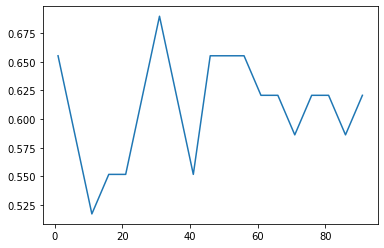

In [90]:
# Draw a graph of decision tree classification accuracy when the size of the training set is varied 
import numpy
ks = range(1,95,5)
accu_list = []
for k in ks:
    knn = neighbors.KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test)
    accu_list.append(accuracy_score(y_test, y_pred))
    

plt.plot(ks,accu_list)
plt.show()


<AxesSubplot:title={'center':'The Total Demand with time'}, xlabel='PRICECATEGORY', ylabel='TOTALDEMAND'>

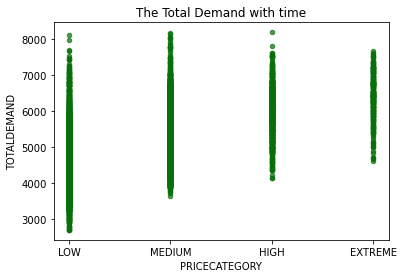

In [201]:
# Make them into clusters
Data_p.plot.scatter (x = 'PRICECATEGORY',
                    y = 'TOTALDEMAND', title = "The Total Demand with time",c = '#07700a', alpha = 0.7) 

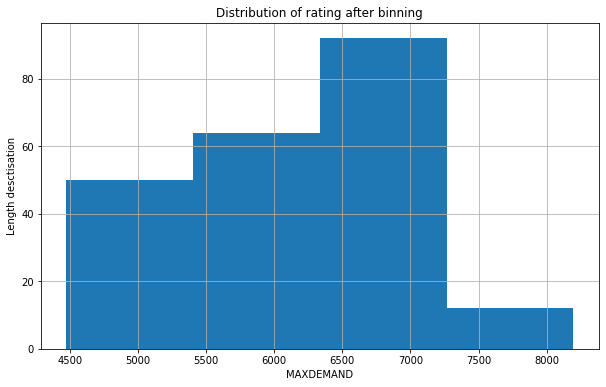

In [91]:
# Length Descretization
MergeData.MAXDEMAND.hist(bins = 4, figsize = (10,6))
plt.xlabel("MAXDEMAND")
plt.ylabel("Length desctisation")
plt.title('Distribution of rating after binning')


plt.show()

In [211]:
# the distribution is not similar in both sides, so ......chi2....... was calculated to check the distribution.

In [92]:
classlabel

0          LOW
1          LOW
2          LOW
3          LOW
4          LOW
        ...   
213       HIGH
214    EXTREME
215     MEDIUM
216    EXTREME
217       HIGH
Name: maximum_daily_price_category, Length: 218, dtype: object

In [93]:
Data_pc = pd.get_dummies(Data_p, columns = ['PRICECATEGORY'])
Data_pc

,REGION,SETTLEMENTDATE,TOTALDEMAND,Date,Time,Price_bin_grade,PRICECATEGORY_EXTREME,PRICECATEGORY_HIGH,PRICECATEGORY_LOW,PRICECATEGORY_MEDIUM
0,VIC1,1/01/2021 0:30,4179.21,2021-01-01,00:30:00,1,0,0,1,0
1,VIC1,1/01/2021 1:00,4047.76,2021-01-01,01:00:00,1,0,0,1,0
2,VIC1,1/01/2021 1:30,3934.70,2021-01-01,01:30:00,1,0,0,1,0
3,VIC1,1/01/2021 2:00,3766.45,2021-01-01,02:00:00,1,0,0,1,0
4,VIC1,1/01/2021 2:30,3590.37,2021-01-01,02:30:00,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
11659,VIC1,31/08/2021 22:00,4861.91,2021-08-31,22:00:00,2,0,0,0,1
11660,VIC1,31/08/2021 22:30,4748.74,2021-08-31,22:30:00,2,0,0,0,1
11661,VIC1,31/08/2021 23:00,4620.09,2021-08-31,23:00:00,2,0,0,0,1
11662,VIC1,31/08/2021 23:30,4834.00,2021-08-31,23:30:00,2,0,0,0,1


In [94]:
MergeData3 = MergeData2.merge(Data_pc, how = 'inner', on = 'Date') 
MergeData3

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,maximum_daily_price_category,REGION,SETTLEMENTDATE,TOTALDEMAND_y,Time,Price_bin_grade_y,PRICECATEGORY_EXTREME,PRICECATEGORY_HIGH,PRICECATEGORY_LOW,PRICECATEGORY_MEDIUM
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,LOW,VIC1,1/01/2021 0:30,4179.21,00:30:00,1,0,0,1,0
1,2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,LOW,VIC1,1/01/2021 1:00,4047.76,01:00:00,1,0,0,1,0
2,2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,LOW,VIC1,1/01/2021 1:30,3934.70,01:30:00,1,0,0,1,0
3,2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,LOW,VIC1,1/01/2021 2:00,3766.45,02:00:00,1,0,0,1,0
4,2021-01-01,15.6,29.9,0.0,2.8,9.3,NE,31,13:14,19.2,...,LOW,VIC1,1/01/2021 2:30,3590.37,02:30:00,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10458,2021-08-30,6.4,17.6,4.0,1.4,7.4,NW,50,14:04,11.1,...,HIGH,VIC1,30/08/2021 21:30,5369.28,21:30:00,2,0,0,0,1
10459,2021-08-30,6.4,17.6,4.0,1.4,7.4,NW,50,14:04,11.1,...,HIGH,VIC1,30/08/2021 22:00,5104.95,22:00:00,1,0,0,1,0
10460,2021-08-30,6.4,17.6,4.0,1.4,7.4,NW,50,14:04,11.1,...,HIGH,VIC1,30/08/2021 22:30,4948.94,22:30:00,1,0,0,1,0
10461,2021-08-30,6.4,17.6,4.0,1.4,7.4,NW,50,14:04,11.1,...,HIGH,VIC1,30/08/2021 23:00,4715.44,23:00:00,1,0,0,1,0


In [95]:
from sklearn.feature_selection import SelectKBest, chi2

X = MergeData3[['PRICECATEGORY_EXTREME','PRICECATEGORY_HIGH','PRICECATEGORY_LOW','PRICECATEGORY_MEDIUM']]
y = MergeData3['Date']
# instantiate
feature_selector = SelectKBest(chi2, k = 4) #...........Chi2

X_new = feature_selector.fit_transform(X,y)
X_new

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]], dtype=uint8)

In [96]:
feature_selector = SelectKBest(mutual_info_classif, k = 4) #.............Mutual Information

X_new = feature_selector.fit_transform(X,y)
X_new

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]], dtype=uint8)

In [98]:
for i in feature_selector.get_support(indices = True):
    print('Word:', data.keys()[i])
    print('Chi Square Score:', feature_selector.scores_[i])
   # print('p-value:', feature_selector.pvalues_[i])
    print()

Word: Minimum temperature (°C)
Chi Square Score: 0.033067107218431424

Word: Maximum temperature (°C)
Chi Square Score: 0.06290174966873607

Word: Sunshine (hours)
Chi Square Score: 0.25635995721794114

Word: Evaporation (mm)
Chi Square Score: 0.1464601186303378



In [99]:
feature_selector.get_support(indices = True)
X,y 
y

0       2021-01-01
1       2021-01-01
2       2021-01-01
3       2021-01-01
4       2021-01-01
           ...    
10458   2021-08-30
10459   2021-08-30
10460   2021-08-30
10461   2021-08-30
10462   2021-08-30
Name: Date, Length: 10463, dtype: datetime64[ns]

In [100]:
# this means that columns 1,2,3,4 are selected.(Date, Maximum temperature, minimum temperature and rainfall)
feature_selector.get_support(indices = True)

array([0, 1, 2, 3])

In [101]:
# these columns are selected because they have the high chi2 score
feature_selector.scores_

array([0.03306711, 0.06290175, 0.25635996, 0.14646012])

In [103]:
##randomly select 66% of the instances to be training and the rest to be testing
X_train, X_test, y_train, y_test = train_test_split(X_new,y, train_size = 0.87, test_size = 0.13, random_state = 42)

#instantiate
feature_selector = SelectKBest(chi2, k = 4) #...........Chi2

#perform selection
X_train = feature_selector.fit_transform(X_train,y_train)
X_test = feature_selector.transform(X_test)

#normalise the data to have 0 mean and unit variance using the library functions.  This will help for later
#computation of distances between instances
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

imputer = SimpleImputer()
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Fitting Data/training
knn = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)



KNeighborsClassifier()

In [104]:
X_train

array([[-0.12812264, -0.25335352, -1.40137626,  1.68297981],
       [-0.12812264, -0.25335352,  0.71358423, -0.59418419],
       [-0.12812264, -0.25335352, -1.40137626,  1.68297981],
       ...,
       [-0.12812264, -0.25335352, -1.40137626,  1.68297981],
       [-0.12812264, -0.25335352,  0.71358423, -0.59418419],
       [-0.12812264, -0.25335352, -1.40137626,  1.68297981]])

In [105]:
#prediction/test
y_pred = knn.predict(X_test)
y_pred

array(['2021-01-09T00:00:00.000000000', '2021-01-09T00:00:00.000000000',
       '2021-03-06T00:00:00.000000000', ...,
       '2021-03-06T00:00:00.000000000', '2021-03-06T00:00:00.000000000',
       '2021-03-06T00:00:00.000000000'], dtype='datetime64[ns]')

In [106]:
# Pricncipal Component Analysis 
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)



In [224]:
X_train.shape

(9102, 2)

In [107]:
# after shaping if we check the X_train
X_train

array([[ 2.06897766, -0.75857337],
       [-0.96565409, -0.09884844],
       [ 2.06897766, -0.75857337],
       ...,
       [ 2.06897766, -0.75857337],
       [-0.96565409, -0.09884844],
       [ 2.06897766, -0.75857337]])

In [108]:
X_test.shape

(1361, 2)

In [109]:
X_test

array([[ 2.06897766, -0.75857337],
       [ 2.06897766, -0.75857337],
       [-0.96565409, -0.09884844],
       ...,
       [-0.96565409, -0.09884844],
       [-0.96565409, -0.09884844],
       [-0.96565409, -0.09884844]])

In [111]:
# shows us how much varient of the original data that the pca has retained.
pca.explained_variance_ratio_

array([0.46640745, 0.27792602])

In [112]:
# no data loss from compression via Pricncipal Component Analysis
pca.explained_variance_ratio_.sum()

0.744333468384755

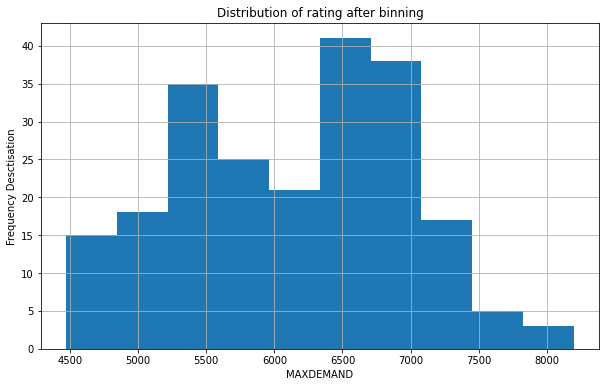

In [113]:
# Frequency Descretization
             
MergeData.MAXDEMAND.hist(bins = 10, figsize = (10,6))
plt.xlabel("MAXDEMAND")
plt.ylabel("Frequency Desctisation")
plt.title('Distribution of rating after binning')


plt.show()

In [114]:
# Count values of PriceCategory data entries
Data_p['PRICECATEGORY'].value_counts()

LOW        7570
MEDIUM     3061
HIGH        777
EXTREME     256
Name: PRICECATEGORY, dtype: int64

In [80]:
Data_p.PRICECATEGORY.unique()

array(['LOW', 'MEDIUM', 'HIGH', 'EXTREME'], dtype=object)

(-1.1112762702946841,
 1.1005369652521277,
 -1.1087674267121206,
 1.1069554353271198)

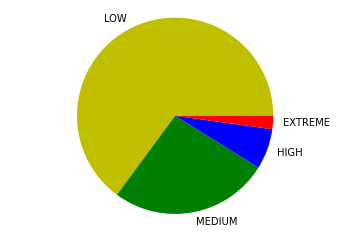

In [115]:
# explaining the price category in pie chart
P_CATEGORY = ["LOW","MEDIUM","HIGH","EXTREME"]
co2 = [7570, 3061,777,256]
colors = ['y','g','b','r' ]
plt.pie(co2,explode=None,labels = P_CATEGORY,colors = colors)
plt.axis('equal')

In [82]:
# calculating the normalised mutual information for the two categorical variables.( small number means weak relationship) 

from sklearn.metrics import normalized_mutual_info_score
normalized_mutual_info_score(Data_p['SETTLEMENTDATE'], Data_p['PRICECATEGORY'])

0.17463937143618494

In [83]:

feature_selector = SelectKBest(mutual_info_classif, k=2)

X_train = feature_selector.fit_transform(X_train, y_train)
X_test = feature_selector.transform(X_test)
feature_selector.scores_

array([0.02291422, 0.07024986, 0.25536688, 0.15522452])